# Education Project - Data Manipulation and Visualization

<img src="https://www.sydney.edu.au/content/dam/corporate/images/faculty-of-arts-and-social-sciences/news-and-events/2021/usyd-quadrangle-banner.jpg" />

### Tables of Contents:

[1. Discovery (identificazione del problema e degli obiettivi)](#1.-Discovery-(identificazione-del-problema-e-degli-obiettivi))

[2. Data Selection](#2.-Data-Selection)

[3. Data Cleaning & Data Transformation](#3.-Data-Cleaning-&-Data-Transformation)

[4. Data Exploration & Data Visualization](#4.-Data-Exploration-&-Data-Visualization)

[5. Conclusioni](#5.-Conclusioni)

## 1. Discovery (identificazione del problema e degli obiettivi)

 Il progetto mira a esaminare il rapporto tra il livello di istruzione nazionale e la qualità delle università in ciascuna nazione. L'obiettivo principale è determinare se ci sia una relazione tra paesi con università di alta qualità e una maggiore istruzione media nel paese.

Per raggiungere questo obiettivo, sono state definite alcune linee guida per il progetto, che consistono in domande chiave da esaminare durante l'analisi dei dati. Queste domande includono:

- Quali sono i paesi con le università di maggiore qualità?
- I paesi con università di maggiore qualità hanno anche un livello di istruzione medio superiore?
- I paesi che investono di più nelle università hanno anche università di maggiore qualità?

## 2. Data Selection

Per identificare i paesi con le università di maggiore qualità, utilizzerò un [dataset](https://www.kaggle.com/datasets/mylesoneill/world-university-rankings) che contiene tre diverse classifiche redatte da tre associazioni diverse, per avere una visione più ampia e diversificata.

Le classifiche utilizzate includono:

- Times Higher Education World University Ranking, considerata una delle misure universitarie più influenti e osservate al mondo. Fondata nel Regno Unito nel 2010, è stata criticata per la sua commercializzazione e per aver penalizzato istituzioni che non insegnano in inglese.

- Academic Ranking of World Universities, anche conosciuta come la classifica di Shanghai, è un'altra classifica altamente influente. Fondata in Cina nel 2003, è stata criticata per aver focalizzato il suo giudizio sul potere di ricerca grezzo e per aver penalizzato le discipline umanistiche e la qualità dell'istruzione.

- Center for World University Rankings, un elenco meno noto che proviene dall'Arabia Saudita, fondato nel 2012.


All'interno della stessa cartella scaricata tramite il link di riferimento, sono presenti anche altri tre dataset utili, tra cui:

- education_expenditure_supplementary_data.csv che riguarda le spese di ogni paese per l'istruzione;
- school_and_country_table.csv che fornisce un elenco delle università e il loro paese di appartenenza;
- educational_attainment_supplementary_data.csv che contiene dati sull'istruzione generale del paese.

Non utilizzerò quest'ultimo dataset, perché utilizzerò invece un [dataset](https://datacatalog.worldbank.org/search/dataset/0038480) più completo. Inoltre, userò un ulteriore [dataset](https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_GDP_(nominal)), di wikipedia, che contiene informazioni sul GDP (PIL) di ogni paese.


### 2.1 Import of packages and data

In [2]:
# Librerie per data manipulation
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None) # Mostra tutte le colonne
pd.set_option('display.max_rows', 250) 

# Librerie per data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pyo.init_notebook_mode()
from adjustText import adjust_text
from matplotlib.ticker import FormatStrFormatter



# Librerie utili
import warnings
warnings.filterwarnings('ignore')
from rapidfuzz import process, utils
import functools as ft

In [3]:
# Classifica CWUR

academic_df = pd.read_csv('cwurData.csv')
df_academic = academic_df.copy()

# Classifica Times

times_df = pd.read_csv('timesData.csv')
df_times = times_df.copy()

# Classifica Shanghai

shanghai_df = pd.read_csv('shanghaiData.csv')
df_shanghai = shanghai_df.copy()

# Dataset "università/paese"
sact_df = pd.read_csv("school_and_country_table.csv")
df_sact = sact_df.copy()

# Livello di istruzione mondiale
ed_data_df = pd.read_csv('EdStatsData.csv')
df_ed_data = ed_data_df.copy()

# Spesa istruzione mondiale
ed_exp_df = pd.read_csv("education_expenditure_supplementary_data.csv",engine='python')
df_ed_exp = ed_exp_df.copy()

# GPU Mondiale
gdp_2000_df = pd.read_csv("gdp_2000_2009.csv",engine='python')
df_gdp_2000 = gdp_2000_df.copy()
gdp_2010_df = pd.read_csv("gdp_2010_2019.csv",engine='python')
df_gdp_2010 = gdp_2010_df.copy()

# Codici ISO
code_df = pd.read_csv('countries_codes_and_coordinates.csv')
df_code = code_df.copy()

## 3. Data Cleaning & Data Transformation

In questa fase, i dati vanno elaborati e trasformati per renderli pronti per la rappresentazione grafica. Per le tre classifiche, si procederà con un'analisi delle università presenti per ogni paese, anno per anno. Successivamente, si analizzeranno solo le università presenti nelle prime 100 posizioni. L'obiettivo è creare una classifica finale che integri le informazioni di tutte e tre le classifiche, in modo da ottenere una visione più ampia e non influenzata da una singola classifica.

### 3.1 Center for World University Rankings


In [4]:
df_academic.head()

world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  citations  broad_impact  patents   score  year  
0             1          1          1           NaN        5  100.00  2012  
1            12          4          4           NaN        1   91.67  2012  
2             4          2          2           NaN       15   89.50  2012  
3            16         16         11           NaN       50   86.17  2012  
4            37         22         22           NaN       18   85.21  2012

In [5]:
# Esamino le info 
df_academic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


Le colonne di mio interesse, sia per questo che per gli altri dataset, sono year e country.

In [6]:
# Controllo eventuali errori all'interno della colonna country
df_academic['country'].unique()

array(['USA', 'United Kingdom', 'Japan', 'Switzerland', 'Israel',
       'Canada', 'France', 'Sweden', 'South Korea', 'Italy', 'Germany',
       'Netherlands', 'Finland', 'Norway', 'Australia', 'Denmark',
       'Singapore', 'Russia', 'China', 'Taiwan', 'Belgium',
       'South Africa', 'Spain', 'Brazil', 'Hong Kong', 'Ireland',
       'Austria', 'New Zealand', 'Portugal', 'Thailand', 'Czech Republic',
       'Malaysia', 'India', 'Greece', 'Mexico', 'Hungary', 'Argentina',
       'Turkey', 'Poland', 'Saudi Arabia', 'Chile', 'Iceland', 'Slovenia',
       'Estonia', 'Lebanon', 'Croatia', 'Colombia', 'Slovak Republic',
       'Iran', 'Egypt', 'Serbia', 'Bulgaria', 'Lithuania', 'Uganda',
       'United Arab Emirates', 'Uruguay', 'Cyprus', 'Romania',
       'Puerto Rico'], dtype=object)

In [7]:
# Modifico eventuali nomi degli stati per renderli più comodi per elaborazioni future

df_academic.loc[df_academic.country == 'USA','country'] = 'United States'

In [8]:
# Controllo la quantità di dati presenti per ogni anno

df_academic['year'].value_counts()

2014    1000
2015    1000
2012     100
2013     100
Name: year, dtype: int64

In [9]:
# df_academic.loc[df_academic['year'] == 2013]

Con il comando eseguito sopra ho verificato, cambiando anche 2013 con 2012, che i 100 dati presenti in quei 2 anni rappersentano la top 100. Pertanto, per il conteggio delle università totali, considererò solo i dati relativi al 2014 e al 2015. Al contrario, per l'analisi della top 100 università, prenderò in considerazione anche i dati relativi al 2012 e al 2013.

In [10]:
# Converto il dataframe in timeseries 
df_acad = df_academic.copy()
df_acad['year'] = pd.to_datetime(df_acad['year'], format='%Y')
df_acad = df_acad.set_index('year')

# Creo un DataFrame con le top 100 università raggruppate per stato per i 4 anni
acad_100 = df_acad.groupby(pd.Grouper(freq='Y')).head(100)
acad_100_y = acad_100.groupby([pd.Grouper(freq='Y'), 'country']).size().unstack(fill_value=None)
acad_100_t = acad_100_y.T


In [11]:
acad_100_t.head()

year       2012-12-31  2013-12-31  2014-12-31  2015-12-31
country                                                  
Australia         2.0         2.0         2.0         2.0
Belgium           NaN         NaN         1.0         1.0
Canada            3.0         4.0         3.0         3.0
China             NaN         NaN         2.0         2.0
Denmark           1.0         1.0         1.0         1.0

In [12]:
# Creo un DataFrame con tutte le università raggruppate per stato del 2014 e 2015
acad_tot = df_acad.groupby([pd.Grouper(freq='Y'), 'country']).size().unstack(fill_value=None)
acad_tot = acad_tot.loc[(acad_tot.index.year != 2012) & (acad_tot.index.year != 2013)]
acad_tot_t = acad_tot.T

In [13]:
acad_tot_t.head()

year       2014-12-31  2015-12-31
country                          
Argentina         4.0         3.0
Australia        27.0        27.0
Austria          12.0        12.0
Belgium          10.0        10.0
Brazil           18.0        18.0

### 3.2 Times Higher Education World University Ranking

In [14]:
df_times.head()

world_rank                        university_name                   country  \
0          1                     Harvard University  United States of America   
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   
3          4                    Stanford University  United States of America   
4          5                   Princeton University  United States of America   

   teaching international  research  citations income total_score  \
0      99.7          72.4      98.7       98.8   34.5        96.1   
1      97.7          54.6      98.0       99.9   83.7        96.0   
2      97.8          82.3      91.4       99.9   87.5        95.6   
3      98.3          29.5      98.1       99.2   64.3        94.3   
4      90.9          70.3      95.4       99.9      -        94.2   

  num_students  student_staff_ratio international_students female_male_ratio  \
0       20,152                  8.9                    25%               NaN   
1        2,243                  6.9                    27%           33 : 67   
2       11,074                  9.0                    33%           37 : 63   
3       15,596                  7.8                    22%           42 : 58   
4        7,929                  8.4                    27%           45 : 55   

   year  
0  2011  
1  2011  
2  2011  
3  2011  
4  2011

In [15]:
# Esamino le info
df_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [16]:
# Controllo eventuali errori all'interno della colonna country
df_times['country'].unique()

array(['United States of America', 'United Kingdom', 'Switzerland',
       'Canada', 'Hong Kong', 'Japan', 'South Korea', 'Singapore',
       'Australia', 'China', 'France', 'Sweden', 'Germany',
       'Republic of Ireland', 'Finland', 'Taiwan', 'South Africa',
       'Turkey', 'Netherlands', 'Belgium', 'Denmark', 'Norway', 'Spain',
       'New Zealand', 'Egypt', 'Austria', 'Israel', 'Brazil', 'Italy',
       'Russian Federation', 'Greece', 'Iceland', 'Czech Republic',
       'India', 'Poland', 'Iran', 'Portugal', 'Thailand', 'Chile',
       'Estonia', 'Saudi Arabia', 'Mexico', 'Colombia', 'Macau',
       'Morocco', 'Luxembourg', 'Unisted States of America', 'Cyprus',
       'Unted Kingdom', 'Uganda', 'Malaysia', 'Lebanon', 'Romania',
       'Slovenia', 'Pakistan', 'Hungary', 'United Arab Emirates',
       'Belarus', 'Serbia', 'Slovakia', 'Bangladesh', 'Ghana', 'Nigeria',
       'Indonesia', 'Jordan', 'Latvia', 'Kenya', 'Argentina', 'Qatar',
       'Oman', 'Ukraine', 'Lithuania'], dtyp

In [17]:
# Modifico eventuali nomi degli stati per renderli più comodi per elaborazioni future

df_times.loc[df_times.country == 'Unted Kingdom','country'] = 'United Kingdom'
df_times.loc[df_times.country == 'Republic of Ireland','country'] = 'Ireland'
df_times.loc[df_times.country == 'United States of America','country'] = 'United States'
df_times.loc[df_times.country == 'Unted Kingdom','country'] = 'United Kingdom'
df_times.loc[df_times.country == 'Unisted States of America','country'] = 'United States'
df_times.loc[df_times.country == 'Russian Federation','country'] = 'Russia'

In [18]:
# Controllo la quantità di dati presenti per ogni anno

df_times['year'].value_counts()

2016    800
2012    402
2015    401
2013    400
2014    400
2011    200
Name: year, dtype: int64

In [19]:
# df_times.loc[df_times['year'] == 2011]

Con il comando eseguito sopra ho verificato che i 100 dati presenti nel 2011 rappersentano la top 100. Pertanto, per il conteggio delle università totali, escluderò il 2011 per i pochi dati. Al contrario, per l'analisi della top 100 università, prenderò in considerazione tutti i dati dei 6 anni.

In [20]:
# Converto il dataframe in timeseries 
df_times1 = df_times.copy()
df_times1['year'] = pd.to_datetime(df_times1['year'], format='%Y')
df_times1 = df_times1.set_index('year')

# Creo un DataFrame con le top 100 università raggruppate per stato per i 6 anni
times_100 = df_times1.groupby(pd.Grouper(freq='Y')).head(100)
times_100_y = times_100.groupby([pd.Grouper(freq='Y'), 'country']).size().unstack(fill_value=None)
times_100_t = times_100_y.T

In [21]:
times_100_t.head()

year       2011-12-31  2012-12-31  2013-12-31  2014-12-31  2015-12-31  \
country                                                                 
Australia         5.0         4.0         6.0         5.0         5.0   
Belgium           NaN         1.0         2.0         2.0         2.0   
Canada            4.0         5.0         5.0         4.0         4.0   
China             3.0         2.0         2.0         2.0         2.0   
Denmark           NaN         NaN         NaN         NaN         NaN   

year       2016-12-31  
country                
Australia         6.0  
Belgium           1.0  
Canada            4.0  
China             2.0  
Denmark           1.0

In [22]:
# Creo un DataFrame con tutte le università raggruppate per stato dal 2012 al 2016
times_tot = df_times1.groupby([pd.Grouper(freq='Y'), 'country']).size().unstack(fill_value=None)
times_tot = times_tot.drop(pd.Timestamp('2011-12-31'))
times_tot_t = times_tot.T

In [23]:
times_tot_t.head()

year        2012-12-31  2013-12-31  2014-12-31  2015-12-31  2016-12-31
country                                                               
Argentina          NaN         NaN         NaN         NaN         1.0
Australia         21.0        19.0        19.0        20.0        31.0
Austria            5.0         6.0         6.0         5.0         7.0
Bangladesh         NaN         NaN         NaN         NaN         1.0
Belarus            NaN         NaN         NaN         NaN         1.0

### 3.3 Academic Ranking of World Universities


In [24]:
df_shanghai.head()

world_rank                              university_name national_rank  \
0          1                           Harvard University             1   
1          2                      University of Cambridge             1   
2          3                          Stanford University             2   
3          4           University of California, Berkeley             3   
4          5  Massachusetts Institute of Technology (MIT)             4   

   total_score  alumni  award   hici     ns    pub   pcp  year  
0        100.0   100.0  100.0  100.0  100.0  100.0  72.4  2005  
1         73.6    99.8   93.4   53.3   56.6   70.9  66.9  2005  
2         73.4    41.1   72.2   88.5   70.9   72.3  65.0  2005  
3         72.8    71.8   76.0   69.4   73.9   72.2  52.7  2005  
4         70.1    74.0   80.6   66.7   65.8   64.3  53.0  2005

In [25]:
# Esamino le info
df_shanghai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897 entries, 0 to 4896
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   world_rank       4897 non-null   object 
 1   university_name  4896 non-null   object 
 2   national_rank    4896 non-null   object 
 3   total_score      1101 non-null   float64
 4   alumni           4896 non-null   float64
 5   award            4895 non-null   float64
 6   hici             4895 non-null   float64
 7   ns               4875 non-null   float64
 8   pub              4895 non-null   float64
 9   pcp              4895 non-null   float64
 10  year             4897 non-null   int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 421.0+ KB


Dalle info risulta che il dataset non contiene una colonna che indica il paese di appartenenza per ciascuna nazione. Pertanto, utilizzerò il dataset "df_sact" per aggiungere una nuova colonna relativa al paese di appartenenza, basandomi sul nome delle università presenti nel dataset originale. Inoltre, noto che esiste un'università priva di nome nella colonna 'university_name'.

In [26]:
#Elimino l'elemento che ha valore NaN nella colonna 'university_name'
shanghai = df_shanghai[df_shanghai['university_name'].notna()]

In [27]:
df_sact.head()

school_name                   country
0                     Harvard University  United States of America
1     California Institute of Technology  United States of America
2  Massachusetts Institute of Technology  United States of America
3                    Stanford University  United States of America
4                   Princeton University  United States of America

Il principale ostacolo da affrontare riguarda la presenza di discrepanze nella scrittura dei nomi delle università nei due dataset, il che renderebbe difficile unirli in modo efficace. Pertanto, per risolvere questo problema, ho applicato un sistema che modifica i nomi dei paesi qualora vi sia una forte somiglianza tra i due nomi, così da poterli abbinare in modo più preciso.

In [28]:
# Rinomino la colonna "school_name" del dataset "sact" per avere lo stesso nome usato negli altri dataset
df_sact.rename(columns={'school_name': 'university_name'}, inplace=True)

In [29]:
# Definisco un dizionario che mappa il nome dell'università nel dataset "sact" al nome corrispondente normalizzato
company_mapping = {company: utils.default_process(company) for company in df_sact.university_name}

# Itero attraverso il dataset "shanghai" e cerca la corrispondenza con il dizionario "company_mapping"

actual_comp = []
similarity = []

for customer in shanghai.university_name:
    _, score, comp = process.extractOne(
        utils.default_process(customer),
        company_mapping,
        processor=None)
    actual_comp.append(comp)
    similarity.append(score)

# Aggiungo le colonne "new" e "similarity" al dataset "shanghai"
shanghai['new'] = pd.Series(actual_comp, index=shanghai.index)
shanghai['similarity'] = pd.Series(similarity, index=shanghai.index)

# Imposto i valori della colonna "university_name" in base alla similarità
shanghai.loc[shanghai['similarity'] >= 90, 'university_name'] = shanghai['new']


In [30]:
shanghai.sort_values('similarity',ascending=True,inplace=True)
shanghai.head()

world_rank                 university_name national_rank  total_score  \
4711    301-400                 ESPCI ParisTech         16-18          NaN   
4212    301-400                 ESPCI ParisTech         15-17          NaN   
1270    203-304  University of Halle-Wittenberg         15-22          NaN   
339     301-400  Polytechnic Institute of Milan         10-18          NaN   
1784    201-302           University of Leipzig         15-24          NaN   

      alumni  award  hici    ns   pub   pcp  year  \
4711     7.3   18.8   0.0  10.3  15.0  29.3  2015   
4212     7.4   18.8   0.0   9.5  15.5  28.9  2014   
1270     5.9    8.9   7.4   7.7  29.0  14.6  2007   
339     10.9   15.8   0.0   6.5  27.7  13.5  2005   
1784    15.8   15.5   0.0  10.8  35.8  16.2  2008   

                                     new  similarity  
4711                     Mines ParisTech        80.0  
4212                     Mines ParisTech        80.0  
1270                  Harvard University        85.5  
339                 University of Oxford        85.5  
1784  California Institute of Technology        85.5

Oridando le università in base alla somiglianza si scopre che alcune continuano ad avere il nome errato quindi vado a modificarli manualmente per renderli uguali a quelli di df_sact.

In [31]:
# Modifica dei nomi delle università
shanghai.loc[shanghai.university_name == 'ESPCI ParisTech','university_name'] = 'Mines ParisTech'
shanghai.loc[shanghai.university_name == 'The Imperial College of Science, Technology and Medicine','university_name'] = 'Imperial College London'
shanghai.loc[shanghai.university_name == 'The University of Texas Health Science Center at San Antonio','university_name'] = 'University of Texas at San Antonio'
shanghai.loc[shanghai.university_name == 'Polytechnic Institute of Milan','university_name'] = 'Polytechnic University of Milan'
shanghai.loc[shanghai.university_name == 'Swiss Federal Institute of Technology Lausanne','university_name'] = 'École Polytechnique Fédérale de Lausanne'
shanghai.loc[shanghai.university_name == 'Catholic University of Louvain','university_name'] = 'Université Catholique de Louvain'
shanghai.loc[shanghai.university_name == 'University of Paris-Sud (Paris 11)','university_name'] = 'Paris-Sud University'
shanghai.loc[shanghai.university_name == 'University of New Hampshire - Durham','university_name'] = 'Durham University'
shanghai.loc[shanghai.university_name == 'University of Hannover','university_name'] = 'Leibniz University of Hanover'
shanghai.loc[shanghai.university_name == 'University of Science, Malaysia','university_name'] = 'Universiti Sains Malaysia'
shanghai.loc[shanghai.university_name == 'University of Wageningen','university_name'] = 'Wageningen University and Research Center'

In [32]:
# Unisco i due dataset
shanghai_new = shanghai.merge(df_sact, on='university_name', how='left')

In [33]:
shanghai_new.head()

world_rank                  university_name national_rank  total_score  \
0    301-400                  Mines ParisTech         16-18          NaN   
1    301-400                  Mines ParisTech         15-17          NaN   
2    203-304   University of Halle-Wittenberg         15-22          NaN   
3    301-400  Polytechnic University of Milan         10-18          NaN   
4    201-302            University of Leipzig         15-24          NaN   

   alumni  award  hici    ns   pub   pcp  year  \
0     7.3   18.8   0.0  10.3  15.0  29.3  2015   
1     7.4   18.8   0.0   9.5  15.5  28.9  2014   
2     5.9    8.9   7.4   7.7  29.0  14.6  2007   
3    10.9   15.8   0.0   6.5  27.7  13.5  2005   
4    15.8   15.5   0.0  10.8  35.8  16.2  2008   

                                  new  similarity country  
0                     Mines ParisTech        80.0  France  
1                     Mines ParisTech        80.0  France  
2                  Harvard University        85.5     NaN  
3                University of Oxford        85.5   Italy  
4  California Institute of Technology        85.5     NaN

Dopo aver unito i due dataset, si può notare che alcune università non sono ancora assegnate ad uno stato. Adesso procederò a calcolare quanti sono gli istituti senza stato di appartenenza.

In [34]:
num_elem = shanghai_new['country'].count()
num_null = shanghai_new['country'].isnull().sum()

print(f'Numero di elementi totali nella colonna "country": {num_elem}')
print(f'Numero di elementi NaN nella colonna "country": {num_null}')
print (f'Differenza: {num_elem - num_null}')

Numero di elementi totali nella colonna "country": 4295
Numero di elementi NaN nella colonna "country": 601
Differenza: 3694


Ora posso osservare che su un totale di quasi 4.300 università, circa 600 non hanno una nazione di appartenenza definita. Esistono diverse opzioni per gestire questa situazione, come inserire manualmente i dati mancanti, cercare elenchi aggiornati o fare web scraping da Wikipedia. Tuttavia, ho deciso di eliminare queste università mancanti poiché il loro numero è relativamente basso e non influiranno significativamente sulle rappresentazioni che andrò a fare.

In [35]:
#Cancello le colonne che ormai non mi servono più
shanghai_new.drop(['new','similarity'],axis=1,inplace=True)

#Elimino l'elemento che ha valore NaN nella colonna 'country'
shanghai_def = shanghai_new[shanghai_new['country'].notna()]

In [36]:
# Controllo la quantità di dati presenti per ogni anno
shanghai_def['year'].value_counts()

2015    451
2014    447
2010    441
2011    440
2009    439
2007    437
2008    435
2006    428
2005    427
2012    257
2013     93
Name: year, dtype: int64

In [37]:
# Controllo eventuali errori all'interno della colonna country
shanghai_def['country'].unique()

array(['France', 'Italy', 'United Kingdom', 'Switzerland',
       'United States of America', 'Belgium', 'Malaysia', 'Germany',
       'Netherlands', 'Brazil', 'Canada', 'Australia', 'Finland',
       'Sweden', 'South Korea', 'Russian Federation', 'Austria',
       'Hong Kong', 'Japan', 'Israel', 'New Zealand', 'Chile', 'Norway',
       'China', 'Spain', 'Taiwan', 'Saudi Arabia', 'Denmark', 'Greece',
       'Republic of Ireland', 'South Africa', 'Czech Republic', 'Iran',
       'Hungary', 'Portugal', 'Mexico', 'Egypt', 'Poland', 'Slovenia',
       'India', 'Singapore', 'Turkey', 'Serbia'], dtype=object)

In [38]:
# Modifico eventuali nomi degli stati per renderli più comodi per elaborazioni future

shanghai_def.loc[shanghai_def.country == 'United States of America','country'] = 'United States'
shanghai_def.loc[shanghai_def.country == 'Republic of Ireland','country'] = 'Ireland'
shanghai_def.loc[shanghai_def.country == 'Russian Federation','country'] = 'Russia'

In [39]:
# shanghai_def.loc[shanghai_def['year'] == 2012]

Con il comando eseguito sopra ho verificato che i dati presenti nel 2012 rappersentano almeno la top 100. Pertanto, per il conteggio delle università totali, escluderò il 2012 e 2013 per i pochi dati. Per l'analisi delle top 100 università, prenderò in considerazione tutti i dati escluso il 2013.

In [40]:
# Creo il dataset shangai_tot dove elimino gli anni 2012 e 2013.
shanghai_tott = shanghai_def.groupby(['year', 'country']).size().unstack(fill_value=None)
shanghai_tott_t = shanghai_tott.T
shanghai_tott_t.drop([2012,2013],axis=1,inplace=True)
shanghai_tott_t.head()

year       2005  2006  2007  2008  2009  2010  2011  2014  2015
country                                                        
Australia  15.0  16.0  17.0  16.0  18.0  18.0  20.0  19.0  21.0
Austria     6.0   7.0   7.0   7.0   7.0   7.0   7.0   6.0   6.0
Belgium     6.0   6.0   6.0   6.0   6.0   6.0   6.0   7.0   7.0
Brazil      3.0   3.0   4.0   5.0   5.0   5.0   5.0   6.0   6.0
Canada     20.0  19.0  20.0  19.0  19.0  21.0  19.0  20.0  18.0

In [41]:
# Creazione della time series
shanghai_ts = shanghai_def.copy()
shanghai_ts['year'] = pd.to_datetime(shanghai_ts['year'], format='%Y')
shanghai_ts = shanghai_ts.set_index('year')


In [42]:
# Creo un DataFrame con tutte le università raggruppate per stato escludendo 2012 e 2013
shanghai_tot = shanghai_ts.groupby([pd.Grouper(freq='Y'), 'country']).size().unstack(fill_value=None)
shanghai_tot = shanghai_tot.loc[(shanghai_tot.index.year != 2012) & (shanghai_tot.index.year != 2013)]
shanghai_tot_t = shanghai_tot.T
shanghai_tot_t.head()

year       2005-12-31  2006-12-31  2007-12-31  2008-12-31  2009-12-31  \
country                                                                 
Australia        15.0        16.0        17.0        16.0        18.0   
Austria           6.0         7.0         7.0         7.0         7.0   
Belgium           6.0         6.0         6.0         6.0         6.0   
Brazil            3.0         3.0         4.0         5.0         5.0   
Canada           20.0        19.0        20.0        19.0        19.0   

year       2010-12-31  2011-12-31  2014-12-31  2015-12-31  
country                                                    
Australia        18.0        20.0        19.0        21.0  
Austria           7.0         7.0         6.0         6.0  
Belgium           6.0         6.0         7.0         7.0  
Brazil            5.0         5.0         6.0         6.0  
Canada           21.0        19.0        20.0        18.0

Analizzando il dataset, ho notato che i punteggi della classifica sembrano essere imprecisi o mancanti. Pertanto, procederò a ricalcolare i punteggi per poter estrarre correttamente le top 100.

In [43]:
#Tramite questa formula ricalcolo il "total_score" di ogni paese che è mancante così poi ricavare il "world_rank"
shan_2015 = shanghai_def.loc[shanghai_def['year'] == 2015]

shan_2015['total_score_new'] = shan_2015.apply(lambda x: 0.1 * x[4] + 0.2 * x[5] + 0.2 * x[6] + 0.2 * x[7] + 
                                                    0.2 * x[8] + 0.1 * x[9],axis=1)
shan_2015[['total_score', 'total_score_new']].corr()

total_score  total_score_new
total_score         1.000000         0.999998
total_score_new     0.999998         1.000000

Con i comandi eseguiti sopra, ho verificato che la formula che applicherò fornirà un punteggio simile a quelli corretti.

In [44]:
shanghai_100 = shanghai_def.set_index('year')

# Calcolo del total_score_re per ogni anno utilizzando una funzione lambda
shanghai_100['total_score_new'] = shanghai_100.apply(
    lambda x: 0.1 * x[4] + 0.2 * x[5] + 0.2 * x[6] + 0.2 * x[7] + 0.2 * x[8] + 0.1 * x[9], axis=1)

# Seleziono i dati relativi agli anni di interesse e ordinamento per total_score_new
shanghai_top100 = shanghai_100.loc[[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2014, 2015]]
shanghai_top100 = shanghai_top100.sort_values(['year', 'total_score_new'], ascending=[True, False])

# Seleziono le prime 100 università per ogni anno
shanghai_top100 = shanghai_top100.groupby('year').head(100)



In [45]:
shanghai_top100.head()

world_rank                        university_name national_rank  \
year                                                                   
2005          1                     Harvard University             1   
2005          2                University of Cambridge             1   
2005          3                    Stanford University             2   
2005          4     University of California, Berkeley             3   
2005          5  Massachusetts Institute of Technology             4   

      total_score  alumni  award   hici     ns    pub   pcp         country  \
year                                                                          
2005        100.0   100.0  100.0  100.0  100.0  100.0  72.4   United States   
2005         73.6    99.8   93.4   53.3   56.6   70.9  66.9  United Kingdom   
2005         73.4    41.1   72.2   88.5   70.9   72.3  65.0   United States   
2005         72.8    71.8   76.0   69.4   73.9   72.2  52.7   United States   
2005         70.1    74.0   80.6   66.7   65.8   64.3  53.0   United States   

      total_score_new  
year                   
2005            97.24  
2005            71.51  
2005            71.39  
2005            70.75  
2005            68.18

In [46]:
shan_100 = shanghai_top100.groupby(['year', 'country']).size().unstack(fill_value=None)
shan_100.index = pd.to_datetime(shan_100.index, format='%Y')
shan_100_t = shan_100.T

In [47]:
shan_100_t.head()

year       2005-01-01  2006-01-01  2007-01-01  2008-01-01  2009-01-01  \
country                                                                 
Australia         2.0         3.0         3.0         3.0         3.0   
Austria           1.0         NaN         NaN         NaN         NaN   
Belgium           NaN         NaN         NaN         NaN         1.0   
Canada            4.0         4.0         4.0         4.0         4.0   
Denmark           1.0         1.0         1.0         2.0         2.0   

year       2010-01-01  2011-01-01  2014-01-01  2015-01-01  
country                                                    
Australia         3.0         4.0         4.0         4.0  
Austria           NaN         NaN         NaN         NaN  
Belgium           1.0         1.0         2.0         2.0  
Canada            5.0         4.0         5.0         4.0  
Denmark           2.0         2.0         2.0         2.0

### 3.4 Combining Dataframes

Ora unisco i 3 dataframe delle università totali in un unico dataframe, così da avere un dataframe più completo. In modo analogo unirò i dataframe delle top 100.

In [48]:
# Dataframe unico delle università totali per paese
tot = [acad_tot_t,shanghai_tot_t,times_tot_t]
df_tot = pd.concat(tot).groupby('country').sum()

#Divido le colonne degli anni dove le classifiche si sono sommate
df_tot["2014-12-31"] = (df_tot["2014-12-31"]/3).round(0)
df_tot["2015-12-31"] = (df_tot["2015-12-31"]/3).round(0)

#Modifico le date
df_tot.columns = df_tot.columns.strftime('%Y-01-01')


In [49]:
df_tot.head()

year        2005-01-01  2006-01-01  2007-01-01  2008-01-01  2009-01-01  \
country                                                                  
Argentina          0.0         0.0         0.0         0.0         0.0   
Australia         15.0        16.0        17.0        16.0        18.0   
Austria            6.0         7.0         7.0         7.0         7.0   
Bangladesh         0.0         0.0         0.0         0.0         0.0   
Belarus            0.0         0.0         0.0         0.0         0.0   

year        2010-01-01  2011-01-01  2012-01-01  2013-01-01  2014-01-01  \
country                                                                  
Argentina          0.0         0.0         0.0         0.0         1.0   
Australia         18.0        20.0        21.0        19.0        22.0   
Austria            7.0         7.0         5.0         6.0         8.0   
Bangladesh         0.0         0.0         0.0         0.0         0.0   
Belarus            0.0         0.0         0.0         0.0         0.0   

year        2015-01-01  2016-01-01  
country                             
Argentina          1.0         1.0  
Australia         23.0        31.0  
Austria            8.0         7.0  
Bangladesh         0.0         1.0  
Belarus            0.0         1.0

In [50]:
# Dataframe unico delle università totali per paese
top100 = [acad_100_t,shan_100_t,times_100_t]
df_top100 = pd.concat(top100).groupby('country').sum()


In [51]:
df_top100.head()

year       2005-01-01  2006-01-01  2007-01-01  2008-01-01  2009-01-01  \
country                                                                 
Australia         2.0         3.0         3.0         3.0         3.0   
Austria           1.0         0.0         0.0         0.0         0.0   
Belgium           0.0         0.0         0.0         0.0         1.0   
Canada            4.0         4.0         4.0         4.0         4.0   
China             0.0         0.0         0.0         0.0         0.0   

year       2010-01-01  2011-01-01  2011-12-31  2012-12-31  2013-12-31  \
country                                                                 
Australia         3.0         4.0         5.0         6.0         8.0   
Austria           0.0         0.0         0.0         0.0         0.0   
Belgium           1.0         1.0         0.0         1.0         2.0   
Canada            5.0         4.0         4.0         8.0         9.0   
China             0.0         0.0         3.0         2.0         2.0   

year       2014-01-01  2014-12-31  2015-01-01  2015-12-31  2016-12-31  
country                                                                
Australia         4.0         7.0         4.0         7.0         6.0  
Austria           0.0         0.0         0.0         0.0         0.0  
Belgium           2.0         3.0         2.0         3.0         1.0  
Canada            5.0         7.0         4.0         7.0         4.0  
China             0.0         4.0         0.0         4.0         2.0

Guardando la tabella sopra si può notare che alcune colonne dello stesso anno non sono sommate tra di loro. Andrò a correggere manualmente impostando anche tutte le colonne con la stessa data

In [52]:
# Sommo le colonne doppie
df_top100['2011-01-01'] = df_top100['2011-01-01'] + df_top100['2011-12-31']
df_top100['2014-01-01'] = df_top100['2014-01-01'] + df_top100['2014-12-31']
df_top100['2015-01-01'] = df_top100['2015-01-01'] + df_top100['2015-12-31']

# Elimino le colonne doppie
df_top100.drop(columns=['2011-12-31'], inplace=True)
df_top100.drop(columns=['2014-12-31'], inplace=True)
df_top100.drop(columns=['2015-12-31'], inplace=True)

# Modifico le date
df_top100.columns = df_top100.columns.strftime('%Y-01-01')


In [53]:
df_top100.head()

year       2005-01-01  2006-01-01  2007-01-01  2008-01-01  2009-01-01  \
country                                                                 
Australia         2.0         3.0         3.0         3.0         3.0   
Austria           1.0         0.0         0.0         0.0         0.0   
Belgium           0.0         0.0         0.0         0.0         1.0   
Canada            4.0         4.0         4.0         4.0         4.0   
China             0.0         0.0         0.0         0.0         0.0   

year       2010-01-01  2011-01-01  2012-01-01  2013-01-01  2014-01-01  \
country                                                                 
Australia         3.0         9.0         6.0         8.0        11.0   
Austria           0.0         0.0         0.0         0.0         0.0   
Belgium           1.0         1.0         1.0         2.0         5.0   
Canada            5.0         8.0         8.0         9.0        12.0   
China             0.0         3.0         2.0         2.0         4.0   

year       2015-01-01  2016-01-01  
country                            
Australia        11.0         6.0  
Austria           0.0         0.0  
Belgium           5.0         1.0  
Canada           11.0         4.0  
China             4.0         2.0

In [54]:
#Divido le colonne degli anni dove le classifiche si sono sommate
df_top100["2011-01-01"] = (df_top100["2011-01-01"]/2).round(0)
df_top100["2012-01-01"] = (df_top100["2012-01-01"]/2).round(0)
df_top100["2013-01-01"] = (df_top100["2013-01-01"]/2).round(0)
df_top100["2014-01-01"] = (df_top100["2014-01-01"]/3).round(0)
df_top100["2015-01-01"] = (df_top100["2015-01-01"]/3).round(0)

In [55]:
df_top100.head()

year       2005-01-01  2006-01-01  2007-01-01  2008-01-01  2009-01-01  \
country                                                                 
Australia         2.0         3.0         3.0         3.0         3.0   
Austria           1.0         0.0         0.0         0.0         0.0   
Belgium           0.0         0.0         0.0         0.0         1.0   
Canada            4.0         4.0         4.0         4.0         4.0   
China             0.0         0.0         0.0         0.0         0.0   

year       2010-01-01  2011-01-01  2012-01-01  2013-01-01  2014-01-01  \
country                                                                 
Australia         3.0         4.0         3.0         4.0         4.0   
Austria           0.0         0.0         0.0         0.0         0.0   
Belgium           1.0         0.0         0.0         1.0         2.0   
Canada            5.0         4.0         4.0         4.0         4.0   
China             0.0         2.0         1.0         1.0         1.0   

year       2015-01-01  2016-01-01  
country                            
Australia         4.0         6.0  
Austria           0.0         0.0  
Belgium           2.0         1.0  
Canada            4.0         4.0  
China             1.0         2.0

Creo anche 2 dataset, uno per le università totali e l'altro per la top 100, con la media del numero di università degli anni presi in considerazione. 

In [56]:
#Media università totali

# copio il DataFrame originale
df_tot_1 = df_tot.copy()

# sostituisco i valori 0 con NaN
df_tot_1 = df_tot_1.replace(0, np.nan)
df_tot_1 = df_tot_1.reset_index()

# calcolo la media per riga e aggiungi una nuova colonna 'mean'
df_tot_1['num univ'] = round(df_tot_1.iloc[:, 1:].mean(axis=1), 0)
df_tot_1.sort_values("num univ",ascending=False,inplace=True)

# creo un nuovo DataFrame con solo le colonne 'country' e 'mean'
df_tot_mean = df_tot_1[['country', 'num univ']].copy()

# rimuovo i nomi delle colonne e degli indici
df_tot_mean.columns.name = None
df_tot_mean.index.name = None

df_tot_mean = df_tot_mean.dropna(subset=['num univ'])
df_tot_mean.head()

country  num univ
73   United States     136.0
72  United Kingdom      47.0
20         Germany      28.0
32           Japan      26.0
31           Italy      22.0

In [57]:
# Media università top 100

# copio il DataFrame originale
df_top100_1 = df_top100.copy()

# sostituisco i valori 0 con NaN
df_top100_1 = df_top100_1.reset_index()
df_top100_1 = df_top100_1.replace(0, np.nan)

# calcolo la media per riga e aggiungi una nuova colonna 'mean'
df_top100_1['num univ'] = round(df_top100_1.iloc[:, 1:].mean(axis=1), 0)
df_top100_1.sort_values("num univ",ascending=False,inplace=True)

# creo un nuovo DataFrame con solo le colonne 'country' e 'mean'
df_top100_mean = df_top100_1[['country', 'num univ']].copy()

df_top100_mean = df_top100_mean.replace(np.nan, 0)

# rimuovo i nomi delle colonne e degli indici
df_top100_mean.columns.name = None
df_top100_mean.index.name = None


df_top100_mean.head()


country  num univ
24   United States      52.0
23  United Kingdom      11.0
8          Germany       5.0
13           Japan       5.0
20     Switzerland       4.0

Se si esaminano entrambe le classifiche, si può notare che gli Stati Uniti vantano un numero molto maggiore di università rispetto agli altri paesi. Questo è in parte dovuto al fatto che all'interno degli Stati Uniti ci sono 50 stati. Anche se noi lo consideriamo come uno stato è un quivalente dell'Europa.

Estraggo dalla top 100 una lista con i nomi degli stati in modo da poter selezionare in modo mirato gli stati di interesse dalle tabelle future.

In [58]:
country = df_top100_mean['country'].tolist()
country

['United States',
 'United Kingdom',
 'Germany',
 'Japan',
 'Switzerland',
 'Australia',
 'Canada',
 'Netherlands',
 'Sweden',
 'France',
 'Singapore',
 'South Korea',
 'Israel',
 'Finland',
 'Denmark',
 'Hong Kong',
 'Ireland',
 'Austria',
 'China',
 'Norway',
 'Russia',
 'Belgium',
 'Italy',
 'Taiwan',
 'Turkey']

### 3.5 Education Statistics Data

In [59]:
df_ed_data.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975       1976  \
0        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  60.999962   

       1977      1978       1979       1980       1981       1982       1983  \
0       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
1       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
2       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
3       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
4  61.92268  62.69342  64.383186  65.617767  66.085152  66.608139  67.290451   

        1984       1985       1986      1987       1988       1989       1990  \
0        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
4  68.510094  69.033211  69.944908  71.04187  71.693779  71.699097  71.995819   

        1991       1992       1993       1994      1995       1996       1997  \
0        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
4  72.602837  70.032722  70.464821  72.645683  71.81176  73.903511  74.425201   

        1998       1999       2000       2001       2002       2003  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4  75.110817  76.254318  77.245682  78.800522  80.051399  80.805389   

        2004       2005       2006       2007       2008       2009  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4  81.607063  82.489487  82.685509  83.280342  84.011871  84.195961   

        2010      2011       2012      2013       2014  2015  2016  2017  \
0        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
1        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
2        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
3        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
4  85.211998  85.24514  86.101669  85.51194  85.320152   NaN   NaN   NaN   

   2020  2025  2030  2035  2040  2045  2050  2055  2060  2065  2070  2075  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

In [60]:
# Esamino le info 
df_ed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [61]:
# Creo un dataframe con solo le colonne che mi interessano
df_ed_new = df_ed_data.loc[:, ['Country Name','Country Code', 'Indicator Name', '2005', '2006', '2007', '2008', '2009',
                       '2010', '2011', '2012', '2013', '2014', '2015', '2016']]

df_ed_new.rename(columns={'Country Name': 'country'}, inplace=True)


In [62]:
# Eseguo un ciclo per capire quali indicatori ci sono ed eventualmente estrarre quelli che mi interessa approfondire.
ind_names = df_ed_new['Indicator Name'].unique()

for names in ind_names:
    # Non mostro la lista in quanto sono circa 3600 indicatori 
    # print(names)
    pass

Questi sono gli indicatori che ho scelto per un ulteriore approfondimento: 
- Barro-Lee: Percentage of population age 15+ with no education
- Barro-Lee: Percentage of population age 15+ with primary schooling. Completed Primary
- Barro-Lee: Percentage of population age 25+ with secondary schooling. Completed Secondary
- Barro-Lee: Percentage of population age 25+ with tertiary schooling. Completed Tertiary
- Barro-Lee: Percentage of population age 75+ with secondary schooling. Completed Secondary
- Barro-Lee: Percentage of population age 75+ with tertiary schooling. Completed Tertiary 
- Enrolment in tertiary education, all programmes, both sexes (number) 
- Graduates from tertiary education, both sexes (number)
- Internet users (per 100 people)
- Personal computers (per 100 people)
- UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total  
- UIS: Percentage of population age 25+ with at least completed lower secondary education (ISCED 2 or higher). Total  
- UIS: Percentage of population age 25+ with a doctoral degree or equivalent (ISCED 8). Total 

In [63]:
# Controllo eventuali errori all'interno della colonna country
df_ed_new['country'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [64]:
# Modifico eventuali nomi degli stati 
df_ed_new.loc[df_ed_new['country'] == 'Korea, Rep.','country'] = 'South Korea'
df_ed_new.loc[df_ed_new['country'] == 'Hong Kong SAR, China','country'] = 'Hong Kong'
df_ed_new.loc[df_ed_new['country'] == 'Russian Federation','country'] = 'Russia'

In [65]:
# Creo un dataframe con solo i paesi della top 100

df_ed_100 = df_ed_new[df_ed_new['country'].isin(country)]

Per ogni indicatore scelto andrò a creare 2 dataset, per le università totali e per la top 100, dove calcolerò il valore medio degli anni selezionati.

Ho scelto i 2 indicatori:
- *Barro-Lee: Percentage of population age 15+ with no education* 
- *Barro-Lee: Percentage of population age 15+ with primary schooling. Completed Primary*

Perché voglio approfondire qual è la percentuale di popolazione adulta che non possiede un'educazione e  la percentuale di popolazione adulta che possiede almeno un'educazione elementare.

In [66]:
# seleziono le righe che si riferiscono alla percentuale di popolazione di età pari o superiore a 15 anni senza istruzione
mask_no_edu_15 = df_ed_new['Indicator Name'] == 'Barro-Lee: Percentage of population age 15+ with no education'

# università totali
# creo un nuovo dataframe con i dati selezionati e calcolo la media
no_edu_15_tot = df_ed_new[mask_no_edu_15]
no_edu_15_tot['BL: 15+ no istruzione %'] = no_edu_15_tot.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
no_edu_15_tot.sort_values(by="BL: 15+ no istruzione %",inplace=True)
no_edu_15_tot.drop(no_edu_15_tot.iloc[:, 2:15], axis=1, inplace=True)

# università top 100
# creo un nuovo dataframe con i dati selezionati della top 100 e calcolo la media
no_edu_15_100 = df_ed_100[mask_no_edu_15]
no_edu_15_100['BL: 15+ no istruzione %'] = no_edu_15_100.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
no_edu_15_100.sort_values(by="BL: 15+ no istruzione %",inplace=True)
no_edu_15_100.drop(no_edu_15_100.iloc[:, 2:15], axis=1, inplace=True)

no_edu_15_100.head()


country Country Code  BL: 15+ no istruzione %
447504           Japan          JPN                     0.15
333889         Finland          FIN                     0.16
846989   United States          USA                     0.39
843324  United Kingdom          GBR                     0.70
220274          Canada          CAN                     0.73

In [67]:
# seleziono le righe che si riferiscono alla percentuale di popolazione di età pari o superiore a 15 anni con istruzione primaria
mask_edu_prim_15 = df_ed_new['Indicator Name'] == 'Barro-Lee: Percentage of population age 15+ with primary schooling. Completed Primary'

# università totali
# creo un nuovo dataframe con i dati selezionati e calcolo la media
prim_edu_15_tot = df_ed_new[mask_edu_prim_15]
prim_edu_15_tot['BL: 15+ con istruzione primaria %'] = prim_edu_15_tot.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
prim_edu_15_tot.sort_values(by="BL: 15+ con istruzione primaria %",inplace=True)
prim_edu_15_tot.drop(prim_edu_15_tot.iloc[:, 2:15], axis=1, inplace=True)

# università top 100
# creo un nuovo dataframe con i dati selezionati della top 100 e calcolo la media
prim_edu_15_100 = df_ed_100[mask_edu_prim_15]
prim_edu_15_100['BL: 15+ con istruzione primaria %'] = prim_edu_15_100.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
prim_edu_15_100.sort_values(by="BL: 15+ con istruzione primaria %",inplace=True)
prim_edu_15_100.drop(prim_edu_15_100.iloc[:, 2:15], axis=1, inplace=True)

prim_edu_15_100.head()

country Country Code  BL: 15+ con istruzione primaria %
627090         Norway          NOR                               0.30
846990  United States          USA                               1.94
220275         Canada          CAN                               2.47
355880        Germany          DEU                               3.54
678400         Russia          RUS                               3.59

Ho scelto i 4 indicatori:
- *Barro-Lee: Percentage of population age 25+ with secondary schooling. Completed Secondary* 
- *Barro-Lee: Percentage of population age 25+ with tertiary schooling. Completed Tertiary*
- *Barro-Lee: Percentage of population age 75+ with secondary schooling. Completed Secondary*
- *Barro-Lee: Percentage of population age 75+ with tertiary schooling. Completed Tertiary*

Perché voglio approfondire com'è cambiato il livello di istruzione, relativo a diploma di istruzione secondaria superiore e laurea, in 50 anni.

In [68]:
# seleziono le righe che si riferiscono alla percentuale di popolazione di età pari o superiore a 25 anni con istruzione secondaria
mask_edu_sec_25 = df_ed_new['Indicator Name'] == 'Barro-Lee: Percentage of population age 25+ with secondary schooling. Completed Secondary'

# università totali
# creo un nuovo dataframe con i dati selezionati e calcolo la media
sec_edu_25_tot = df_ed_new[mask_edu_sec_25]
sec_edu_25_tot['BL: 25+ con istruzione secondaria %'] = sec_edu_25_tot.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
sec_edu_25_tot.sort_values(by="BL: 25+ con istruzione secondaria %",inplace=True)
sec_edu_25_tot.drop(sec_edu_25_tot.iloc[:, 2:15], axis=1, inplace=True)

# università top 100
# creo un nuovo dataframe con i dati selezionati della top 100 e calcolo la media
sec_edu_25_100 = df_ed_100[mask_edu_sec_25]
sec_edu_25_100['BL: 25+ con istruzione secondaria %'] = sec_edu_25_100.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
sec_edu_25_100.sort_values(by="BL: 25+ con istruzione secondaria %",inplace=True)
sec_edu_25_100.drop(sec_edu_25_100.iloc[:, 2:15], axis=1, inplace=True)

sec_edu_25_100.head()

country Country Code  BL: 25+ con istruzione secondaria %
817693     Turkey          TUR                                15.82
242288      China          CHN                                20.72
678423     Russia          RUS                                24.65
429203    Ireland          IRL                                24.98
715073  Singapore          SGP                                27.39

In [69]:
# seleziono le righe che si riferiscono alla percentuale di popolazione di età pari o superiore a 25 anni con istruzione universitaria
mask_edu_ter_25 = df_ed_new['Indicator Name'] == 'Barro-Lee: Percentage of population age 25+ with tertiary schooling. Completed Tertiary'

# università totali
# creo un nuovo dataframe con i dati selezionati e calcolo la media
ter_edu_25_tot = df_ed_new[mask_edu_ter_25]
ter_edu_25_tot['BL: 25+ con istruzione universitaria %'] = ter_edu_25_tot.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
ter_edu_25_tot.sort_values(by="BL: 25+ con istruzione universitaria %",inplace=True)
ter_edu_25_tot.drop(ter_edu_25_tot.iloc[:, 2:15], axis=1, inplace=True)

# università top 100
# creo un nuovo dataframe con i dati selezionati della top 100 e calcolo la media
ter_edu_25_100 = df_ed_100[mask_edu_ter_25]
ter_edu_25_100['BL: 25+ con istruzione universitaria %'] = ter_edu_25_100.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
ter_edu_25_100.sort_values(by="BL: 25+ con istruzione universitaria %",inplace=True)
ter_edu_25_100.drop(ter_edu_25_100.iloc[:, 2:15], axis=1, inplace=True)

ter_edu_25_100.head()

country Country Code  BL: 25+ con istruzione universitaria %
242290    China          CHN                                    2.54
817695   Turkey          TUR                                    6.36
440200    Italy          ITA                                    7.33
132340  Austria          AUT                                   10.85
337580   France          FRA                                   11.07

In [70]:
# seleziono le righe che si riferiscono alla percentuale di popolazione di età pari o superiore a 75 anni con istruzione secondaria
mask_edu_sec_75 = df_ed_new['Indicator Name'] == 'Barro-Lee: Percentage of population age 75+ with secondary schooling. Completed Secondary'

# università totali
# creo un nuovo dataframe con i dati selezionati e calcolo la media
sec_edu_75_tot = df_ed_new[mask_edu_sec_75]
sec_edu_75_tot['BL: 75+ con istruzione secondaria %'] = sec_edu_75_tot.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
sec_edu_75_tot.sort_values(by="BL: 75+ con istruzione secondaria %",inplace=True)
sec_edu_75_tot.drop(sec_edu_75_tot.iloc[:, 2:15], axis=1, inplace=True)

# università top 100
# creo un nuovo dataframe con i dati selezionati della top 100 e calcolo la media
sec_edu_75_100 = df_ed_100[mask_edu_sec_75]
sec_edu_75_100['BL: 75+ con istruzione secondaria %'] = sec_edu_75_100.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
sec_edu_75_100.sort_values(by="BL: 75+ con istruzione secondaria %",inplace=True)
sec_edu_75_100.drop(sec_edu_75_100.iloc[:, 2:15], axis=1, inplace=True)
sec_edu_75_100.head()

country Country Code  BL: 75+ con istruzione secondaria %
817770       Turkey          TUR                                 3.32
242365        China          CHN                                 4.16
469595  South Korea          KOR                                 7.64
403625    Hong Kong          HKG                                 8.14
440275        Italy          ITA                                 8.57

In [71]:
# seleziono le righe che si riferiscono alla percentuale di popolazione di età pari o superiore a 75 anni con istruzione universitaria
mask_edu_ter_75 = df_ed_new['Indicator Name'] == 'Barro-Lee: Percentage of population age 75+ with tertiary schooling. Completed Tertiary'

# università totali
# creo un nuovo dataframe con i dati selezionati e calcolo la media
ter_edu_75_tot = df_ed_new[mask_edu_ter_75]
ter_edu_75_tot['BL: 75+ con istruzione universitaria %'] = ter_edu_75_tot.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
ter_edu_75_tot.sort_values(by="BL: 75+ con istruzione universitaria %",inplace=True)
ter_edu_75_tot.drop(ter_edu_75_tot.iloc[:, 2:15], axis=1, inplace=True)

# università top 100
# creo un nuovo dataframe con i dati selezionati della top 100 e calcolo la media
ter_edu_75_100 = df_ed_100[mask_edu_ter_75]
ter_edu_75_100['BL: 75+ con istruzione universitaria %'] = ter_edu_75_100.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
ter_edu_75_100.sort_values(by="BL: 75+ con istruzione universitaria %",inplace=True)
ter_edu_75_100.drop(ter_edu_75_100.iloc[:, 2:15], axis=1, inplace=True)

ter_edu_75_100.head()

country Country Code  BL: 75+ con istruzione universitaria %
242367      China          CHN                                    0.84
817772     Turkey          TUR                                    1.52
440277      Italy          ITA                                    2.26
715152  Singapore          SGP                                    3.26
403627  Hong Kong          HKG                                    4.04

Ho scelto i 2 indicatori:
- *Enrolment in tertiary education, all programmes, both sexes (number)* 
- *Graduates from tertiary education, both sexes (number)*

Perché voglio approfondire quanto è il rapporto tra studenti iscritti e laureati all'università.

In [72]:
# seleziono le righe che si riferiscono al numero di persone che si sono iscritte all'università.
enr_edu_ter = df_ed_new['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)'

# università top 100
# creo un nuovo dataframe con i dati selezionati della top 100 e calcolo la media
ter_enr_100 = df_ed_100[enr_edu_ter]

ter_enr_100['iscritti università'] = ter_enr_100.mean(axis=1).round(2)
# ordino il dataframe  e rimuovo le colonne superflue
ter_enr_100.sort_values(by="iscritti università",inplace=True)
ter_enr_100.drop(ter_enr_100.iloc[:, 2:15], axis=1, inplace=True)

ter_enr_100.head()

country Country Code  iscritti università
430009      Ireland          IRL            193184.55
715879    Singapore          SGP            221915.33
627919       Norway          NOR            232397.18
781849  Switzerland          CHE            246865.82
404354    Hong Kong          HKG            247070.59

In [73]:
# seleziono le righe che si riferiscono al numero di persone che si sono laureate
grad_edu_ter = df_ed_new['Indicator Name'] == 'Graduates from tertiary education, both sexes (number)'

# università top 100
# creo un nuovo dataframe con i dati selezionati della top 100 e calcolo la media
ter_grad_100 = df_ed_100[grad_edu_ter]

ter_grad_100['laureati università'] = ter_grad_100.mean(axis=1).round(2)
# ordino il dataframe  e rimuovo le colonne superflue
ter_grad_100.sort_values(by="laureati università",inplace=True)
ter_grad_100.drop(ter_grad_100.iloc[:, 2:15], axis=1, inplace=True)

ter_grad_100.head()

country Country Code  laureati università
628020     Norway          NOR             39101.91
404455  Hong Kong          HKG             41296.00
334820    Finland          FIN             49191.00
287175    Denmark          DNK             57560.18
133245    Austria          AUT             58319.37

Unisco i 2 dataset così da poter fare il rapporto iscritti laureati

In [74]:
# unisco i dataset
enr_grad = ter_enr_100.merge(ter_grad_100,on='country', how='left')

# elimino la colonna Country Code_y
enr_grad.drop(['Country Code_y'],axis=1,inplace=True)

# Cambio il nome della colonna in country
enr_grad.rename(columns={'Country Code_x': "alpha-3"}, inplace=True)
enr_grad['laureati/iscritti %'] = ((enr_grad['laureati università']/enr_grad['iscritti università'])*100).round(2)
enr_grad_100 = enr_grad.copy()
enr_grad_100.head()

country alpha-3  iscritti università  laureati università  \
0      Ireland     IRL            193184.55             60096.00   
1    Singapore     SGP            221915.33                  NaN   
2       Norway     NOR            232397.18             39101.91   
3  Switzerland     CHE            246865.82             77337.00   
4    Hong Kong     HKG            247070.59             41296.00   

   laureati/iscritti %  
0                31.11  
1                  NaN  
2                16.83  
3                31.33  
4                16.71

Ho scelto i 3 indicatori:
- *Barro-Lee: Percentage of population age 15+ with no education* 
- *Barro-Lee: Percentage of population age 15+ with primary schooling. Completed Primary*

Perché voglio approfondire qual è la percentuale di popolazione adulta che non possiede un'educazione e  la percentuale di popolazione adulta che possiede almeno un'educazione elementare.

Internet users (per 100 people)

In [75]:
# seleziono le righe che si riferiscono alla percentuale di popolazione che ha accesso a internet
mask_int_users = df_ed_new['Indicator Name'] == 'Internet users (per 100 people)'

# università totali
# creo un nuovo dataframe con i dati selezionati e calcolo la media
users_int_tot = df_ed_new[mask_int_users]
users_int_tot['internet users %'] = users_int_tot.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
users_int_tot.sort_values(by="internet users %",inplace=True)
users_int_tot.drop(users_int_tot.iloc[:, 2:15], axis=1, inplace=True)

# università top 100
# creo un nuovo dataframe con i dati selezionati della top 100 e calcolo la media
users_int_100 = df_ed_100[mask_int_users]
users_int_100['internet users %'] = users_int_100.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
users_int_100.sort_values(by="internet users %",inplace=True)
users_int_100.drop(users_int_100.iloc[:, 2:15], axis=1, inplace=True)

users_int_100.head()

country Country Code  internet users %
243265   China          CHN             33.22
818670  Turkey          TUR             39.21
679400  Russia          RUS             46.49
441175   Italy          ITA             50.38
437510  Israel          ISR             61.11

In [76]:
# seleziono le righe che si riferiscono alla percentuale di popolazione che ha accesso a internet
mask_pers_comp = df_ed_new['Indicator Name'] == 'Personal computers (per 100 people)'

# università totali
# creo un nuovo dataframe con i dati selezionati e calcolo la media
pers_comp_tot = df_ed_new[mask_pers_comp]
pers_comp_tot['personal computers %'] = pers_comp_tot.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
pers_comp_tot.sort_values(by="personal computers %",inplace=True)
pers_comp_tot.drop(pers_comp_tot.iloc[:, 2:15], axis=1, inplace=True)

# università top 100
# creo un nuovo dataframe con i dati selezionati della top 100 e calcolo la media
pers_comp_100 = df_ed_100[mask_pers_comp]
pers_comp_100['personal computers %'] = pers_comp_100.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
pers_comp_100.sort_values(by="personal computers %",inplace=True)
pers_comp_100.drop(pers_comp_100.iloc[:, 2:15], axis=1, inplace=True)

pers_comp_100.head()

country Country Code  personal computers %
243974    China          CHN                  5.20
819379   Turkey          TUR                  6.21
680109   Russia          RUS                 12.65
441884    Italy          ITA                 36.62
159679  Belgium          BEL                 37.63

Ho scelto i 2 indicatori:
- *UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total*  
- *UIS: Percentage of population age 25+ with at least completed lower secondary education (ISCED 2 or higher). Total* 

Perché voglio confrontarli con gli indicatori di *Barro-Lee 25+* per vedere se ci sono discrepanze o se sono simili.

In [77]:
# seleziono le righe che si riferiscono alla percentuale di popolazione di età pari o superiore a 25 anni con almeno un'istruzione di scuole superiori
mask_uis_sec_25 = df_ed_new['Indicator Name'] == 'UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total'

# università totali
# creo un nuovo dataframe con i dati selezionati e calcolo la media
uis_sec_25_tot = df_ed_new[mask_uis_sec_25]
uis_sec_25_tot['UIS: 25+ con diploma superiori %'] = uis_sec_25_tot.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
uis_sec_25_tot.sort_values(by="UIS: 25+ con diploma superiori %",inplace=True)
uis_sec_25_tot.drop(uis_sec_25_tot.iloc[:, 2:15], axis=1, inplace=True)

# università top 100
# creo un nuovo dataframe con i dati selezionati della top 100 e calcolo la media
uis_sec_25_100 = df_ed_100[mask_uis_sec_25]
uis_sec_25_100['UIS: 25+ con diploma superiori %'] = uis_sec_25_100.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
uis_sec_25_100.sort_values(by="UIS: 25+ con diploma superiori %",inplace=True)
uis_sec_25_100.drop(uis_sec_25_100.iloc[:, 2:15], axis=1, inplace=True)

uis_sec_25_100.head()

country Country Code  UIS: 25+ con diploma superiori %
245128      China          CHN                             22.32
820533     Turkey          TUR                             29.44
443038      Italy          ITA                             45.05
406388  Hong Kong          HKG                             57.86
160833    Belgium          BEL                             62.45

In [78]:
# seleziono le righe che si riferiscono alla percentuale di popolazione di età pari o superiore a 25 anni con almeno un'istruzione di scuole medie
mask_uis_sec_low_25 = df_ed_new['Indicator Name'] == 'UIS: Percentage of population age 25+ with at least completed lower secondary education (ISCED 2 or higher). Total'

# università totali
# creo un nuovo dataframe con i dati selezionati e calcolo la media
uis_sec_low_25_tot = df_ed_new[mask_uis_sec_low_25]
uis_sec_low_25_tot['UIS: 25+ con diploma medie %'] = uis_sec_low_25_tot.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
uis_sec_low_25_tot.sort_values(by="UIS: 25+ con diploma medie %",inplace=True)
uis_sec_low_25_tot.drop(uis_sec_low_25_tot.iloc[:, 2:15], axis=1, inplace=True)

# università top 100
# creo un nuovo dataframe con i dati selezionati della top 100 e calcolo la media
uis_sec_low_25_100 = df_ed_100[mask_uis_sec_low_25]
uis_sec_low_25_100['UIS: 25+ con diploma medie %'] = uis_sec_low_25_100.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
uis_sec_low_25_100.sort_values(by="UIS: 25+ con diploma medie %",inplace=True)
uis_sec_low_25_100.drop(uis_sec_low_25_100.iloc[:, 2:15], axis=1, inplace=True)

uis_sec_low_25_100.head()

country Country Code  UIS: 25+ con diploma medie %
820521     Turkey          TUR                         43.40
245116      China          CHN                         65.32
443026      Italy          ITA                         73.47
406376  Hong Kong          HKG                         74.55
717901  Singapore          SGP                         75.62

Ho scelto questo indicatore:
- *UIS: Percentage of population age 25+ with a doctoral degree or equivalent (ISCED 8). Total*

Perché voglio approndire il numero di persone che possiedono un dottorato o equivalente.

In [79]:
# seleziono le righe che si riferiscono alla percentuale di popolazione di età pari o superiore a 25 anni con un dottorato o equivalente
mask_uis_doc_25 = df_ed_new['Indicator Name'] == 'UIS: Percentage of population age 25+ with a doctoral degree or equivalent (ISCED 8). Total'

# università totali
# creo un nuovo dataframe con i dati selezionati e calcolo la media
uis_doc_25_tot = df_ed_new[mask_uis_doc_25]
uis_doc_25_tot['UIS: 25+ con dottorato %'] = uis_doc_25_tot.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
uis_doc_25_tot.sort_values(by="UIS: 25+ con dottorato %",inplace=True)
uis_doc_25_tot.drop(uis_doc_25_tot.iloc[:, 2:15], axis=1, inplace=True)

# università top 100
# creo un nuovo dataframe con i dati selezionati della top 100 e calcolo la media
uis_doc_25_100 = df_ed_100[mask_uis_doc_25]
uis_doc_25_100['UIS: 25+ con dottorato %'] = uis_doc_25_100.mean(axis=1).round(2)

# ordino il dataframe  e rimuovo le colonne superflue
uis_doc_25_100.sort_values(by="UIS: 25+ con dottorato %",inplace=True)
uis_doc_25_100.drop(uis_doc_25_100.iloc[:, 2:15], axis=1, inplace=True)

uis_doc_25_100.head()

country Country Code  UIS: 25+ con dottorato %
289080      Denmark          DNK                      0.32
820505       Turkey          TUR                      0.34
160805      Belgium          BEL                      0.54
604270  Netherlands          NLD                      0.56
472330  South Korea          KOR                      0.58

### 3.6 Education Expenditure

Questo dataset lo utilizzerò per ricavare la percentuale di PIL che ogni stato investe nelle università.

In [80]:
df_ed_exp.head()

country     institute_type direct_expenditure_type  1995  2000  2005  \
0  OECD Average  All Institutions                   Public   4.9   4.9   5.0   
1     Australia  All Institutions                   Public   4.5   4.6   4.3   
2       Austria  All Institutions                   Public   5.3   5.4   5.2   
3       Belgium  All Institutions                   Public   5.0   5.1   5.8   
4        Canada  All Institutions                   Public   5.8   5.2   4.8   

   2009  2010  2011  
0   5.4   5.4   5.3  
1   4.5   4.6   4.3  
2   5.7   5.6   5.5  
3   6.4   6.4   6.4  
4   5.0   5.2   NaN

In [81]:
# Esamino le info 
df_ed_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  333 non-null    object 
 1   institute_type           333 non-null    object 
 2   direct_expenditure_type  333 non-null    object 
 3   1995                     94 non-null     float64
 4   2000                     99 non-null     float64
 5   2005                     106 non-null    float64
 6   2009                     103 non-null    float64
 7   2010                     101 non-null    float64
 8   2011                     282 non-null    float64
dtypes: float64(6), object(3)
memory usage: 23.5+ KB


In [82]:
# Controllo eventuali errori all'interno della colonna country
df_ed_exp['country'].unique()

array(['OECD Average', 'Australia', 'Austria', 'Belgium', 'Canada',
       'Chile', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Korea, Republic of', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'United Kingdom', 'United States',
       '  Brazil', '  Russian Federation'], dtype=object)

In [83]:
# Modifico eventuali nomi degli stati per renderli più comodi per elaborazioni future
df_ed_exp.loc[df_ed_exp['country'] == 'Korea, Rep.','country'] = 'South Korea'
df_ed_exp.loc[df_ed_exp['country'] == '  Russian Federation','country'] = 'Russia'

In [84]:
df_ed_exp['institute_type'].unique()

array(['All Institutions ', 'Elementary and Secondary Institutions ',
       'Higher Education Institutions '], dtype=object)

In [85]:
df_ed_exp['direct_expenditure_type'].unique()

array(['Public', 'Private', 'Total'], dtype=object)

All'interno delle colonne *institute_type* e *direct_expenditure_type* andrò a selezionare la combinazione *Higher Education Institutions* e *Total* in quanto sono interessato alle spese universitarie totali

In [86]:
# creo il dataset con la combinazione di Higher Education Institution e Total
df_ed_exp_high = df_ed_exp.loc[(df_ed_exp['institute_type'] == 'Higher Education Institutions ') & (df_ed_exp['direct_expenditure_type'] == 'Total')]


In [87]:
df_ed_exp_high.head()

country                  institute_type direct_expenditure_type  \
296  OECD Average  Higher Education Institutions                    Total   
297     Australia  Higher Education Institutions                    Total   
298       Austria  Higher Education Institutions                    Total   
299       Belgium  Higher Education Institutions                    Total   
300        Canada  Higher Education Institutions                    Total   

     1995  2000  2005  2009  2010  2011  
296   NaN   NaN   NaN   NaN   NaN   1.6  
297   NaN   NaN   NaN   NaN   NaN   1.6  
298   NaN   NaN   NaN   NaN   NaN   1.5  
299   NaN   NaN   NaN   NaN   NaN   1.4  
300   NaN   NaN   NaN   NaN   NaN   NaN

Nel dataset sopra si nota che sono presenti solo i dati del 2011 quindi andrò a utilizzare solo quell'anno.

In [88]:
# rinomino la colonna 2011
df_ed_exp_high.rename(columns={'2011': "spesa per università (% PIL)"}, inplace=True)
 
# elimino tutte le colonne non necessarie    
df_ed_exp_high.drop(df_ed_exp_high.iloc[:, 1:8], axis=1, inplace=True)
df_ed_exp_high.head()

country  spesa per università (% PIL)
296  OECD Average                           1.6
297     Australia                           1.6
298       Austria                           1.5
299       Belgium                           1.4
300        Canada                           NaN

### 3.7 World GDP 

Da wikipedia ho raccolto le tabelle del GDP (Gross Domestic Product) mondiale, in Italia chiamato PIL (Prodotto Interno Lordo), che mi serviranno per capire quanto i paesi spendono in dollari.

In [89]:
df_gdp_2000.head()

Country (or dependent territory)    2000    2001    2002    2003    2004  \
0                      Afghanistan       —       —   4,367   4,553   5,146   
1                          Albania   3,483   3,928   4,348   5,611   7,185   
2                          Algeria  54,749  54,745  56,761  67,864  85,332   
3                          Andorra   1,429   1,547   1,758   2,362   2,896   
4                           Angola  11,166  10,930  15,286  17,813  23,552   

      2005     2006     2007     2008     2009  
0    6,167    6,925    8,556   10,297   12,066  
1    8,052    8,896   10,677   12,881   12,044  
2  103,198  117,027  134,977  171,001  137,211  
3    3,158    3,456    3,952    4,082    3,675  
4   36,971   52,381   65,266   88,539   70,307

In [90]:
# Esamino le info 
df_gdp_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country (or dependent territory)  196 non-null    object
 1   2000                              196 non-null    object
 2   2001                              196 non-null    object
 3   2002                              196 non-null    object
 4   2003                              196 non-null    object
 5   2004                              196 non-null    object
 6   2005                              196 non-null    object
 7   2006                              196 non-null    object
 8   2007                              196 non-null    object
 9   2008                              196 non-null    object
 10  2009                              196 non-null    object
dtypes: object(11)
memory usage: 17.0+ KB


In [91]:
# Cambio il nome della colonna in country
df_gdp_2000.rename(columns={'Country (or dependent territory)': "country"}, inplace=True)

In [92]:
# Controllo eventuali errori all'interno della colonna country
df_gdp_2000['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cape Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Democratic Republic of the Congo',
       'Republic of the Congo', 'Costa Rica', 'Ivory Coast', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',


In [93]:
df_gdp_2010.head()

Country (or dependent territory)     2010     2011     2012     2013  \
0                      Afghanistan   15,325   17,890   20,293   20,170   
1                          Albania   11,937   12,899   12,324   12,784   
2                          Algeria  161,207  200,020  209,059  209,755   
3                          Andorra    3,446    3,625    3,189    3,193   
4                           Angola   83,799  111,790  128,053  136,710   

      2014     2015     2016     2017     2018     2019  
0   20,616   20,057   18,020   18,883   18,401   18,876  
1   13,246   11,389   11,862   13,053   15,157   15,399  
2  213,810  165,979  160,034  170,207  175,372  171,070  
3    3,267    2,789    2,895    2,993    3,217    3,155  
4  145,712  116,194  101,124  122,022  101,353   84,516

In [94]:
# Esamino le info 
df_gdp_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country (or dependent territory)  196 non-null    object
 1   2010                              194 non-null    object
 2   2011                              196 non-null    object
 3   2012                              196 non-null    object
 4   2013                              196 non-null    object
 5   2014                              196 non-null    object
 6   2015                              196 non-null    object
 7   2016                              196 non-null    object
 8   2017                              196 non-null    object
 9   2018                              196 non-null    object
 10  2019                              196 non-null    object
dtypes: object(11)
memory usage: 17.0+ KB


In [95]:
# Cambio il nome della colonna in country
df_gdp_2010.rename(columns={'Country (or dependent territory)': "country"}, inplace=True)

In [96]:
# Controllo eventuali errori all'interno della colonna country
df_gdp_2010['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cape Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Democratic Republic of the Congo',
       'Republic of the Congo', 'Costa Rica', 'Ivory Coast', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',


In [97]:
# Unisco i 2 dataset
df_gdp = df_gdp_2000.merge(df_gdp_2010, on='country', how='left')

In [98]:
df_gdp.head()

country    2000    2001    2002    2003    2004     2005     2006  \
0  Afghanistan       —       —   4,367   4,553   5,146    6,167    6,925   
1      Albania   3,483   3,928   4,348   5,611   7,185    8,052    8,896   
2      Algeria  54,749  54,745  56,761  67,864  85,332  103,198  117,027   
3      Andorra   1,429   1,547   1,758   2,362   2,896    3,158    3,456   
4       Angola  11,166  10,930  15,286  17,813  23,552   36,971   52,381   

      2007     2008     2009     2010     2011     2012     2013     2014  \
0    8,556   10,297   12,066   15,325   17,890   20,293   20,170   20,616   
1   10,677   12,881   12,044   11,937   12,899   12,324   12,784   13,246   
2  134,977  171,001  137,211  161,207  200,020  209,059  209,755  213,810   
3    3,952    4,082    3,675    3,446    3,625    3,189    3,193    3,267   
4   65,266   88,539   70,307   83,799  111,790  128,053  136,710  145,712   

      2015     2016     2017     2018     2019  
0   20,057   18,020   18,883   18,401   18,876  
1   11,389   11,862   13,053   15,157   15,399  
2  165,979  160,034  170,207  175,372  171,070  
3    2,789    2,895    2,993    3,217    3,155  
4  116,194  101,124  122,022  101,353   84,516

In [99]:
# rimuovo le colonne
df_gdp.drop(df_gdp.iloc[:, 1:6], axis=1, inplace=True)
df_gdp.drop(df_gdp.iloc[:, 13:16], axis=1, inplace=True)

In [100]:
# rimuovo la virgola
df_gdp.iloc[:, 1:] = df_gdp.iloc[:, 1:].applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)


# trasformo i dati da object a numeric
df_gdp.iloc[:, 1:] = df_gdp.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# calcolo la media
df_gdp['GDP medio'] = df_gdp.iloc[:, 1:].mean(axis=1).round(2)

df_gdp_mean = df_gdp[['country', 'GDP medio']]
df_gdp_mean.head()

country  GDP medio
0  Afghanistan   14698.50
1      Albania   11582.58
2      Algeria  165273.17
3      Andorra    3393.92
4       Angola   94737.17

Unisco i dataset del GDP e della spesa universitarià % così da poter calcolare la spesa universitaria in dollari. Visto il poco numero di dati utilizzerò il dataset solo per i paesi della top 100

In [101]:
#unisco i dataset
globe_exp = df_ed_exp_high.merge(df_gdp_mean, on='country', how='left')

# calcolo la media
globe_exp['spesa per università $'] = ((globe_exp['spesa per università (% PIL)']/100)*globe_exp['GDP medio']).round(2)

# creo un dataset per la top 100
globe_exp_100 = globe_exp[globe_exp['country'].isin(country)]
globe_exp_100.head()

country  spesa per università (% PIL)   GDP medio  spesa per università $
1  Australia                           1.6  1194419.33                19110.71
2    Austria                           1.5   396635.25                 5949.53
3    Belgium                           1.4   480195.67                 6722.74
4     Canada                           NaN  1572251.17                     NaN
7    Denmark                           1.9   320574.42                 6090.91

### 3.8 ISO CODE

utilizzo questo dataset per estrarre i codici ISO i quali ci serviranno nella parte di visualizzazione per creare le rappresentazioni tramite mappa

In [102]:
df_code.head()

name alpha-2 alpha-3  country-code     iso_3166-2   region  \
0     Afghanistan      AF     AFG             4  ISO 3166-2:AF     Asia   
1   Åland Islands      AX     ALA           248  ISO 3166-2:AX   Europe   
2         Albania      AL     ALB             8  ISO 3166-2:AL   Europe   
3         Algeria      DZ     DZA            12  ISO 3166-2:DZ   Africa   
4  American Samoa      AS     ASM            16  ISO 3166-2:AS  Oceania   

        sub-region intermediate-region  region-code  sub-region-code  \
0    Southern Asia                 NaN        142.0             34.0   
1  Northern Europe                 NaN        150.0            154.0   
2  Southern Europe                 NaN        150.0             39.0   
3  Northern Africa                 NaN          2.0             15.0   
4        Polynesia                 NaN          9.0             61.0   

   intermediate-region-code  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [103]:
# Esamino le info
df_code.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      249 non-null    object 
 1   alpha-2                   248 non-null    object 
 2   alpha-3                   249 non-null    object 
 3   country-code              249 non-null    int64  
 4   iso_3166-2                249 non-null    object 
 5   region                    248 non-null    object 
 6   sub-region                248 non-null    object 
 7   intermediate-region       107 non-null    object 
 8   region-code               248 non-null    float64
 9   sub-region-code           248 non-null    float64
 10  intermediate-region-code  107 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 21.5+ KB


In [104]:
# Cambio il nome della colonna name in country
df_code.rename(columns={'name': "country"}, inplace=True)

# Controllo eventuali errori all'interno della colonna country
df_code['country'].unique()

array(['Afghanistan', 'Åland Islands', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands',
       'Colombia', 'Comoros', 'Congo',
       'Congo, Democratic Republic of the', 'Cook Islands', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       

In [105]:
# Modifico eventuali nomi degli stati per renderli più comodi per elaborazioni future
df_code.loc[df_code.country == 'United Kingdom of Great Britain and Northern Ireland','country'] = 'United Kingdom'
df_code.loc[df_code.country == 'Republic of Ireland','country'] = 'Ireland'
df_code.loc[df_code.country == 'United States of America','country'] = 'United States'
df_code.loc[df_code.country == 'Russian Federation','country'] = 'Russia'
df_code.loc[df_code.country == 'Korea, Republic of','country'] = 'South Korea'
df_code.loc[df_code.country == 'Iran (Islamic Republic of)'] = 'Iran'

# Modifico eventuali errori nella colonna alpha-3
df_code.loc[df_code['alpha-3'] == 'Iran', 'alpha-3'] = 'IRN'


In [106]:
# Creo un dataset con solo country e alpha-3
df_alpha = df_code[['country', 'alpha-3']]

# Creo un dataset solo con i paesi della top 100
df_alpha_100 = df_alpha[df_alpha['country'].isin(country)]
df_alpha_100.head()

country alpha-3
13  Australia     AUS
14    Austria     AUT
21    Belgium     BEL
40     Canada     CAN
45      China     CHN

### 3.9 Final Dataframes

In questa fase combinerò tutti i dataframe così da poter accedere facilmente a tutti i dati di cui ho bisogno.

In [107]:
# Unisco tutti i dataset riguardanti la top 100

top100_list = [df_top100_mean, no_edu_15_100, prim_edu_15_100, sec_edu_25_100, ter_edu_25_100, sec_edu_75_100,
                ter_edu_75_100, enr_grad_100, users_int_100, pers_comp_100, uis_sec_25_100, uis_sec_low_25_100,
                uis_doc_25_100, globe_exp_100]

df_all_top100 = ft.reduce(lambda  left,right: pd.merge(left,right,on=['country'],
                                            how='outer'), top100_list)
# elimino le colonne non necessarie
df_all_top100.drop(['Country Code_x'],axis=1, inplace=True)
df_all_top100.drop(['Country Code_y'],axis=1, inplace=True)
df_all_top100.drop(['Country Code'],axis=1, inplace=True)

# elimino Taiwan in quanto non ha dati
df_all_top100 = df_all_top100.drop(df_all_top100[df_all_top100.country == 'Taiwan'].index)
df_all_top100.reset_index(drop=True, inplace=True)

# trasformo la spesa per università da milioni a miliardi
df_all_top100['spesa per università $'] = (df_all_top100['spesa per università $']/1000).round(2)
df_all_top100.rename(columns={'spesa per università $': 'spesa per università $ miliardi'}, inplace=True)

df_all_top100.head()

country  num univ  BL: 15+ no istruzione %  \
0   United States      52.0                     0.39   
1  United Kingdom      11.0                     0.70   
2         Germany       5.0                     3.22   
3           Japan       5.0                     0.15   
4     Switzerland       4.0                     6.19   

   BL: 15+ con istruzione primaria %  BL: 25+ con istruzione secondaria %  \
0                               1.94                                35.98   
1                              14.98                                36.95   
2                               3.54                                55.24   
3                              10.73                                39.06   
4                               9.20                                43.58   

   BL: 25+ con istruzione universitaria %  \
0                                   29.40   
1                                   17.27   
2                                   14.80   
3                                   19.56   
4                                   18.33   

   BL: 75+ con istruzione secondaria %  \
0                                42.88   
1                                18.42   
2                                40.33   
3                                22.78   
4                                38.24   

   BL: 75+ con istruzione universitaria % alpha-3  iscritti università  \
0                                   18.83     USA          19228349.64   
1                                   10.10     GBR           2393757.48   
2                                    6.24     DEU           2889999.08   
3                                    4.32     JPN           3929534.90   
4                                    7.64     CHE            246865.82   

   laureati università  laureati/iscritti %  internet users %  \
0           3063415.30                15.93             72.35   
1            711303.36                29.71             83.50   
2                  NaN                  NaN             80.52   
3           1011262.20                25.73             80.04   
4             77337.00                31.33             82.37   

   personal computers %  UIS: 25+ con diploma superiori %  \
0                 78.59                             87.15   
1                 77.95                             82.27   
2                 62.06                             80.79   
3                   NaN                             80.61   
4                 90.80                             83.43   

   UIS: 25+ con diploma medie %  UIS: 25+ con dottorato %  \
0                         94.74                      1.72   
1                         99.82                      0.90   
2                         96.77                      1.28   
3                           NaN                       NaN   
4                         96.30                      2.94   

   spesa per università (% PIL)    GDP medio  spesa per università $ miliardi  
0                           2.7  15731218.75                           424.74  
1                           1.2   2771122.33                            33.25  
2                           1.3   3462745.42                            45.02  
3                           1.6   5185963.83                            82.98  
4                           NaN    611118.33                              NaN

In [108]:
# Unisco tutti i dataset riguardanti tutte le università

tot_list = [df_tot_mean, no_edu_15_tot, prim_edu_15_tot, sec_edu_25_tot, ter_edu_25_tot, sec_edu_75_tot,
                ter_edu_75_tot, users_int_tot, pers_comp_tot, uis_sec_25_tot, uis_sec_low_25_tot,
                uis_doc_25_tot]
 
df_all_tot = ft.reduce(lambda  left,right: pd.merge(left,right,on=['country'],
                                            how='outer'), tot_list)

# elimino le colonne non necessarie
df_all_tot.drop(['Country Code_x'],axis=1, inplace=True)
df_all_tot.drop(['Country Code_y'],axis=1, inplace=True)
df_all_tot.drop(['Country Code'],axis=1, inplace=True)

df_all_tot.head()

country  num univ  BL: 15+ no istruzione %  \
0   United States     136.0                     0.39   
1  United Kingdom      47.0                     0.70   
2         Germany      28.0                     3.22   
3           Japan      26.0                     0.15   
4           Italy      22.0                     6.23   

   BL: 15+ con istruzione primaria %  BL: 25+ con istruzione secondaria %  \
0                               1.94                                35.98   
1                              14.98                                36.95   
2                               3.54                                55.24   
3                              10.73                                39.06   
4                              18.04                                31.90   

   BL: 25+ con istruzione universitaria %  \
0                                   29.40   
1                                   17.27   
2                                   14.80   
3                                   19.56   
4                                    7.33   

   BL: 75+ con istruzione secondaria %  \
0                                42.88   
1                                18.42   
2                                40.33   
3                                22.78   
4                                 8.57   

   BL: 75+ con istruzione universitaria %  internet users %  \
0                                   18.83             72.35   
1                                   10.10             83.50   
2                                    6.24             80.52   
3                                    4.32             80.04   
4                                    2.26             50.38   

   personal computers %  UIS: 25+ con diploma superiori %  \
0                 78.59                             87.15   
1                 77.95                             82.27   
2                 62.06                             80.79   
3                   NaN                             80.61   
4                 36.62                             45.05   

   UIS: 25+ con diploma medie %  UIS: 25+ con dottorato %  
0                         94.74                      1.72  
1                         99.82                      0.90  
2                         96.77                      1.28  
3                           NaN                       NaN  
4                         73.47                       NaN

In [109]:
# Unisco il codice ISO al numero di università totali
num_univ_tot = df_tot.merge(df_alpha, on='country', how='left')
num_univ_tot = num_univ_tot.dropna(subset=['alpha-3'])
num_univ_tot.head()

country  2005-01-01  2006-01-01  2007-01-01  2008-01-01  2009-01-01  \
0   Argentina         0.0         0.0         0.0         0.0         0.0   
1   Australia        15.0        16.0        17.0        16.0        18.0   
2     Austria         6.0         7.0         7.0         7.0         7.0   
3  Bangladesh         0.0         0.0         0.0         0.0         0.0   
4     Belarus         0.0         0.0         0.0         0.0         0.0   

   2010-01-01  2011-01-01  2012-01-01  2013-01-01  2014-01-01  2015-01-01  \
0         0.0         0.0         0.0         0.0         1.0         1.0   
1        18.0        20.0        21.0        19.0        22.0        23.0   
2         7.0         7.0         5.0         6.0         8.0         8.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2016-01-01 alpha-3  
0         1.0     ARG  
1        31.0     AUS  
2         7.0     AUT  
3         1.0     BGD  
4         1.0     BLR

In [110]:
# converto il dataframe per facilitarmi la rappresentazione grafica
df_melt_tot = num_univ_tot.melt(id_vars=['country', 'alpha-3'], var_name='Year', value_name='Numero di università')
df_melt_tot['Year'] = pd.to_datetime(df_melt_tot['Year']).dt.year

df_melt_tot.head()

country alpha-3  Year  Numero di università
0   Argentina     ARG  2005                   0.0
1   Australia     AUS  2005                  15.0
2     Austria     AUT  2005                   6.0
3  Bangladesh     BGD  2005                   0.0
4     Belarus     BLR  2005                   0.0

In [111]:
# Unisco il codice ISO al numero di università top 100
num_univ_100 = df_top100.merge(df_alpha, on='country', how='left')
num_univ_100 = num_univ_100.dropna(subset=['alpha-3'])

num_univ_100.head()

country  2005-01-01  2006-01-01  2007-01-01  2008-01-01  2009-01-01  \
0  Australia         2.0         3.0         3.0         3.0         3.0   
1    Austria         1.0         0.0         0.0         0.0         0.0   
2    Belgium         0.0         0.0         0.0         0.0         1.0   
3     Canada         4.0         4.0         4.0         4.0         4.0   
4      China         0.0         0.0         0.0         0.0         0.0   

   2010-01-01  2011-01-01  2012-01-01  2013-01-01  2014-01-01  2015-01-01  \
0         3.0         4.0         3.0         4.0         4.0         4.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         1.0         0.0         0.0         1.0         2.0         2.0   
3         5.0         4.0         4.0         4.0         4.0         4.0   
4         0.0         2.0         1.0         1.0         1.0         1.0   

   2016-01-01 alpha-3  
0         6.0     AUS  
1         0.0     AUT  
2         1.0     BEL  
3         4.0     CAN  
4         2.0     CHN

In [112]:
# converto il dataframe per facilitarmi la rappresentazione grafica
df_melt_100 = num_univ_100.melt(id_vars=['country', 'alpha-3'], var_name='Year', value_name='Numero di università')
df_melt_100['Year'] = pd.to_datetime(df_melt_100['Year']).dt.year

df_melt_100.head()

country alpha-3  Year  Numero di università
0  Australia     AUS  2005                   2.0
1    Austria     AUT  2005                   1.0
2    Belgium     BEL  2005                   0.0
3     Canada     CAN  2005                   4.0
4      China     CHN  2005                   0.0

## 4. Data Exploration & Data Visualization

In questa fase analizzerò e rappresenterò i dati in dettaglio nel modo più chiaro possibile attraverso l'uso di grafici.

In [113]:
df_melt_tot_graph = df_melt_tot.replace(0,np.nan)

fig = px.choropleth(df_melt_tot_graph, locations='alpha-3', hover_name="country", 
                    color='Numero di università', scope='world', 
                    animation_frame ='Year', range_color=(1,100), color_continuous_scale = px.colors.sequential.Turbo)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(visible=False, resolution=50, scope="world",
    showcountries=True, countrycolor="Black")

fig.update_layout(margin={"r":0,"t":25,"l":0,"b":0}, 
                  title="Numero di università totali per paese")
fig.show()

In questo contesto vengono prese tutte le università analizzate da varie classifiche.  Guardando la mappa e la legenda di colori sulla destra, possiamo notare che dal 2005 al 2016, gli Stati Uniti sono sempre al primo posto con un netto distacco. Al secondo posto, troviamo quasi sempre il Regno Unito e occasionalmente la Germania. Il Canada, la Cina, il Giappone, l'Australia, la Svezia e anche l'Italia (dal 2012) si confermano negli anni come paesi con molte università.

In [114]:
df_melt_100_graph = df_melt_100.replace(0,np.nan)

fig = px.choropleth(df_melt_100_graph, locations='alpha-3', hover_name="country", 
                    color='Numero di università', scope='world', 
                    animation_frame ='Year', range_color=(1,30), color_continuous_scale = px.colors.sequential.Turbo)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(visible=False, resolution=50, scope="world",
    showcountries=True, countrycolor="Black")

fig.update_layout(margin={"r":0,"t":25,"l":0,"b":0}, 
                  title="Numero di università in Top 100 per paese")
fig.show()

In questa classifica, viene invece rappresentato il numero di università presenti nella Top 100 per ciascun paese, analizzando solo quelli che hanno istituzioni di altissimo livello. Anche qui, gli Stati Uniti dominano, con spesso la metà delle presenze totali, seguiti immediatamente dal Regno Unito. Francia, Germania, Giappone, Australia, Svezia e Canada di solito necessitano di soli 4 posti per classificarsi al terzo posto. Italia e Cina, rispetto alla classifica precedente, praticamente scompaiono.

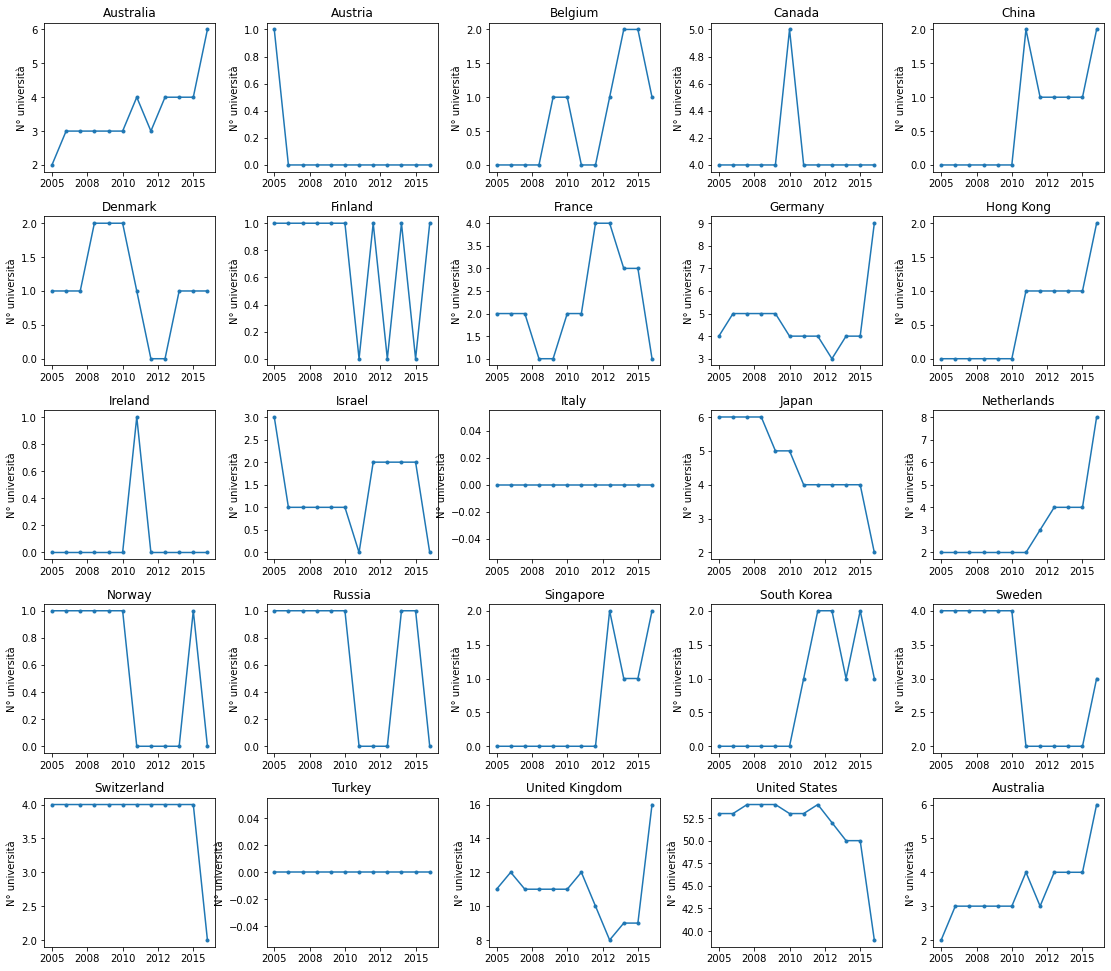

In [115]:
df_melt_100['Year'] = df_melt_100['Year'].astype('int64')
fig = plt.figure(figsize=(19,17))

for c,num in zip(df_melt_100['country'], range(1,26)):
    
    df0=df_melt_100[df_melt_100['country']==c]
    ax = fig.add_subplot(5,5,num)
    ax.grid(True)
    df0.plot(x='Year',y ='Numero di università',title=c, ax=ax, legend=False,marker=".",color="tab:blue")
    ax.set_ylabel('N° università')
    ax.set_xlabel('')
    fig.subplots_adjust(hspace=0.3)
    fig.subplots_adjust(wspace=0.3)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

    
plt.show()

Analizzando l'andamento annuale del numero di università presenti nella Top 100 di ciascuna nazione si può notare che Stati Uniti hanno mostrato una diminuzione molto forte a partire dal 2015. Il Regno Unito insieme a Hong Kong e Olanda, invece, hanno una forte crescita dal 2015. Giappone e Francia, negli ultimi anni, hanno mostrato una discesa costante. Gli altri paesi sono più o meno stabili o mostrano leggere fluttuazioni.

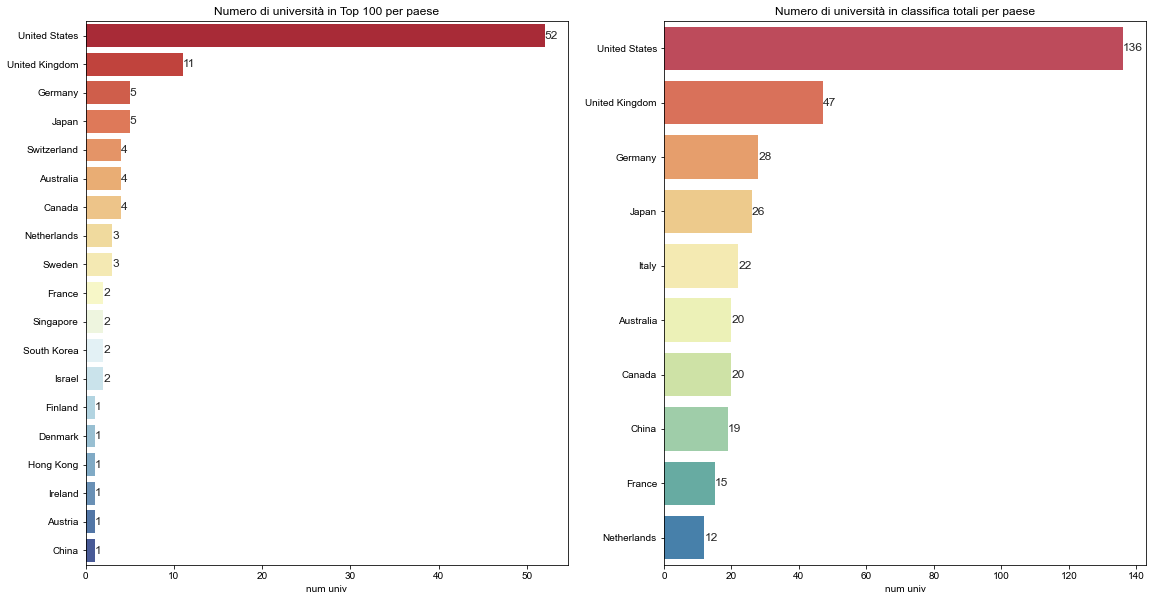

In [116]:

fig, axes = plt.subplots(1, 2,figsize=(19, 10))

sns.barplot(ax=axes[0],x=df_top100_mean.head(19)['num univ'], y=df_top100_mean.head(19)['country'],palette="RdYlBu")
axes[0].set_title("Numero di università in Top 100 per paese")
sns.barplot(ax=axes[1],x=df_tot_mean['num univ'].head(10), y=df_tot_mean['country'].head(10),palette="Spectral")
sns.set_theme(color_codes=True)
axes[1].set_title("Numero di università in classifica totali per paese")
axes[0].set_ylabel('') 
axes[1].set_ylabel('') 

for i in axes[0].containers:
    axes[0].bar_label(i,)
for i in axes[1].containers:
    axes[1].bar_label(i,)
plt.show()

A sinistra abbiamo i paesi con il maggior numero di università presenti nella Top 100, mentre a destra troviamo la classifica dei paesi con il maggior numero di università totali considerate nei tre rankings precedenti. Si nota chiaramente il netto vantaggio degli Stati Uniti su entrambe le classifiche. Considerando le due "Top 10", troviamo quasi gli stessi paesi, ad eccezione dell'Italia, che non hanno università presenti nella Top 100, ma hanno un elevato numero di università totali considerate nei tre rankings.

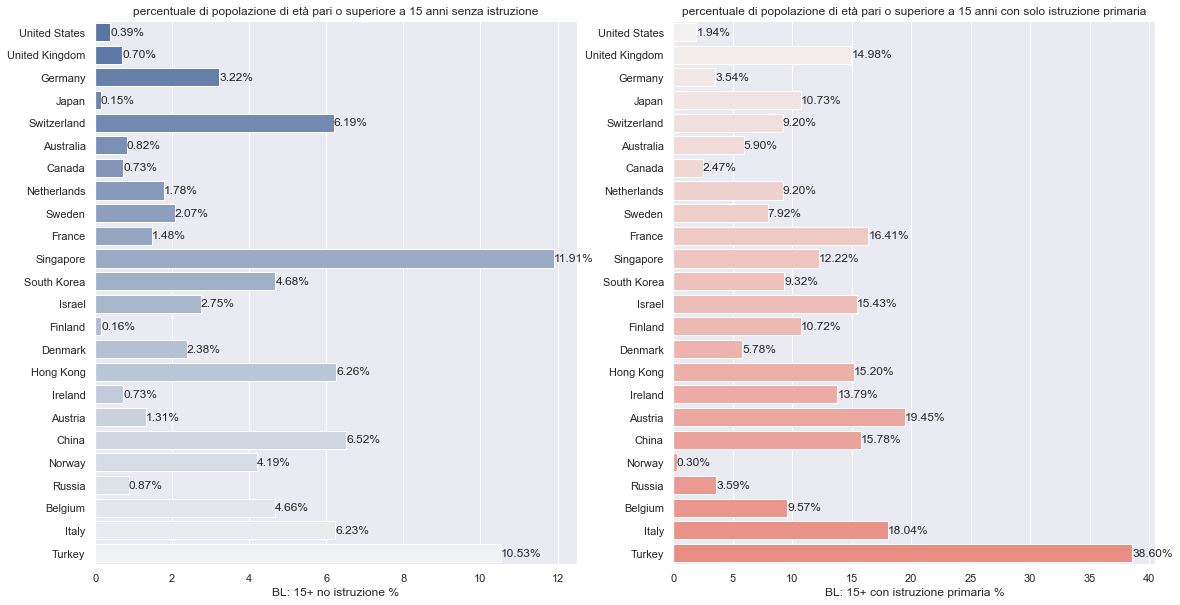

In [117]:
fig, axes = plt.subplots(1, 2,figsize=(19, 10))

sns.barplot(ax=axes[0],x=df_all_top100.head(25)['BL: 15+ no istruzione %'], y=df_all_top100.head(25)['country'],palette="light:b_r")
axes[0].set_title("percentuale di popolazione di età pari o superiore a 15 anni senza istruzione")
sns.barplot(ax=axes[1],x=df_all_top100['BL: 15+ con istruzione primaria %'].head(25), y=df_all_top100['country'].head(25),palette="light:salmon")
sns.set_theme(color_codes=True)
axes[1].set_title("percentuale di popolazione di età pari o superiore a 15 anni con solo istruzione primaria")
axes[0].set_ylabel('') 
axes[1].set_ylabel('') 

for i in axes[0].containers:
    axes[0].bar_label(i,fmt='%.2f%%')
for i in axes[1].containers:
    axes[1].bar_label(i,fmt='%.2f%%')
plt.show()

Esamineremo ora la percentuale di popolazione di ogni paese sopra i 15 anni che non ha ricevuto alcun tipo di istruzione o che ha ricevuto almeno un'istruzione primaria, in modo da ottenere una prima visione generale del livello di istruzione delle popolazioni. È evidente che, in questo caso, un valore basso indica un livello di istruzione più elevato. Possiamo notare che gli Stati Uniti hanno, in entrambi grafici, una percentuale bassissima, questo significa che la maggior parte della popolazione ha un livello di istruzione almeno di levello medie. Risaltano invece, in modo negativo, Svizzera, Singapore, Sud Corea, Hong Kong, Cina, Italia e Turchia in quanto hanno un'elevata percentuale di popolazione senza istruzione. Questi stessi paesi hanno anche un'elevata percentuale di popolazione con solo istruzione primaria questo più i dati precedenti indicano un basso livello di istruzione nazionale.  

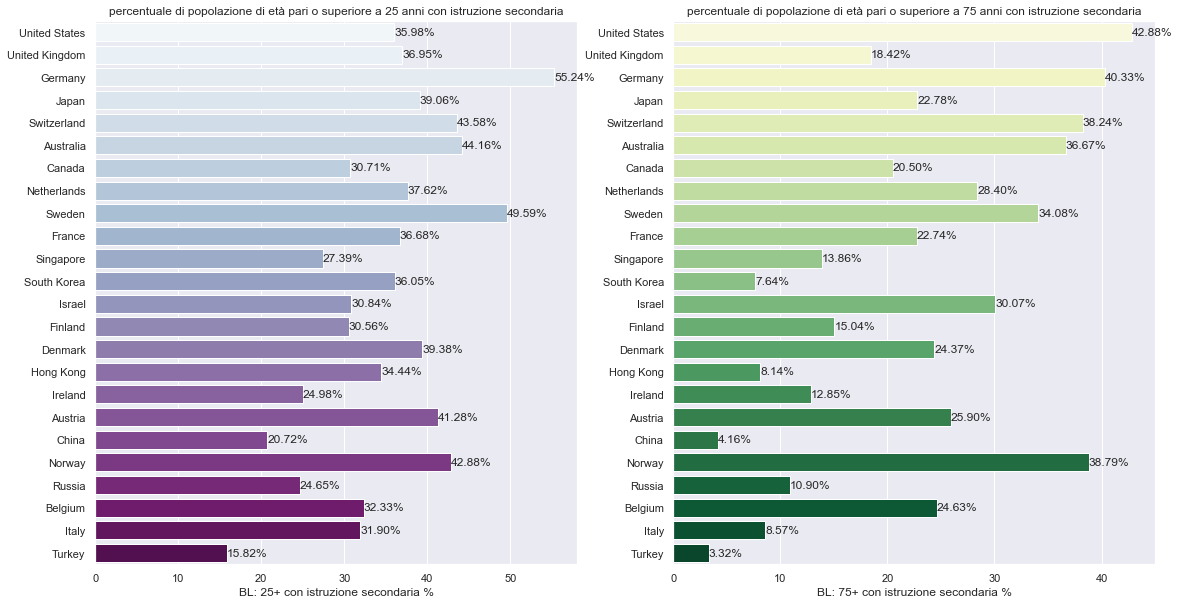

In [118]:
fig, axes = plt.subplots(1, 2,figsize=(19, 10))

sns.barplot(ax=axes[0],x=df_all_top100.head(25)['BL: 25+ con istruzione secondaria %'], y=df_all_top100.head(25)['country'],palette="BuPu")
axes[0].set_title("percentuale di popolazione di età pari o superiore a 25 anni con istruzione secondaria")
sns.barplot(ax=axes[1],x=df_all_top100['BL: 75+ con istruzione secondaria %'].head(25), y=df_all_top100['country'].head(25),palette="YlGn")
sns.set_theme(color_codes=True)
axes[1].set_title("percentuale di popolazione di età pari o superiore a 75 anni con istruzione secondaria")
axes[0].set_ylabel('') 
axes[1].set_ylabel('') 

for i in axes[0].containers:
    axes[0].bar_label(i,fmt='%.2f%%')
for i in axes[1].containers:
    axes[1].bar_label(i,fmt='%.2f%%')
plt.show()

I seguenti due grafici confrontano la percentuale di persone sopra i 25 anni e sopra i 75 anni che hanno completato l'istruzione secondaria, al fine di valutare come sia cambiata la situazione in un periodo di 50 anni. Come ci si potrebbe aspettare, il numero di persone che ha conseguito un livello di istruzione più elevato è in costante aumento in tutti i paesi presi in considerazione. Tuttavia, a sorpresa, gli Stati Uniti sono l'unico paese che, invece di registrare un aumento, ha visto una diminuzione della percentuale di persone con istruzione secondaria sopra i 25 anni.

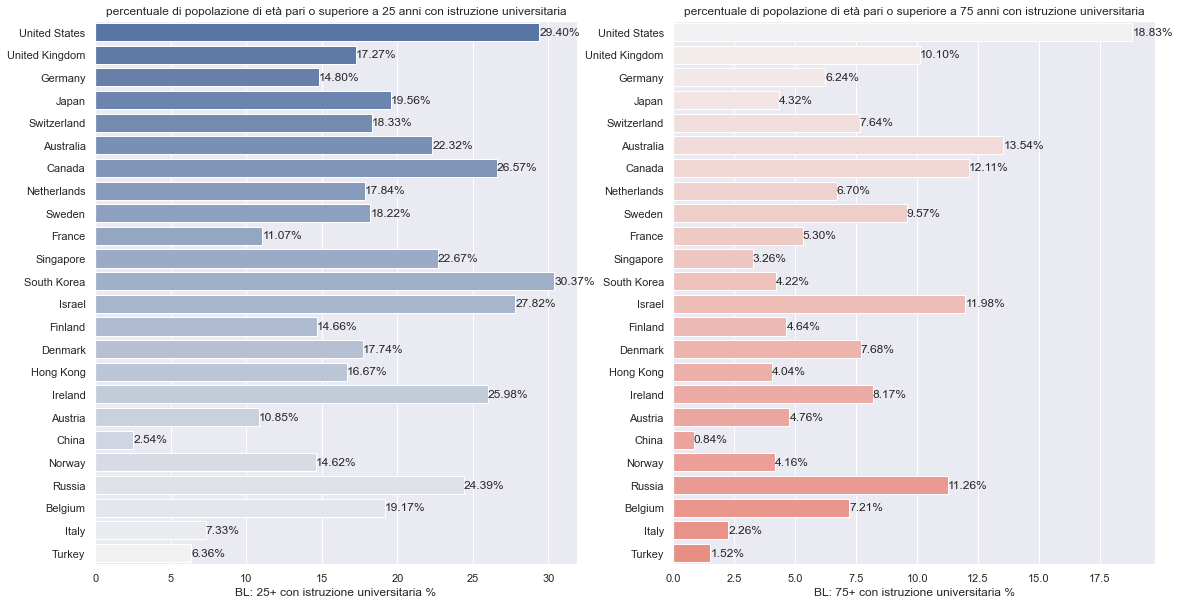

In [119]:
fig, axes = plt.subplots(1, 2,figsize=(19, 10))

sns.barplot(ax=axes[0],x=df_all_top100.head(25)['BL: 25+ con istruzione universitaria %'], y=df_all_top100.head(25)['country'],palette="light:b_r")
axes[0].set_title("percentuale di popolazione di età pari o superiore a 25 anni con istruzione universitaria")
sns.barplot(ax=axes[1],x=df_all_top100['BL: 75+ con istruzione universitaria %'].head(25), y=df_all_top100['country'].head(25),palette="light:salmon")
sns.set_theme(color_codes=True)
axes[1].set_title("percentuale di popolazione di età pari o superiore a 75 anni con istruzione universitaria")
axes[0].set_ylabel('') 
axes[1].set_ylabel('') 

for i in axes[0].containers:
    axes[0].bar_label(i,fmt='%.2f%%')
for i in axes[1].containers:
    axes[1].bar_label(i,fmt='%.2f%%')
plt.show()

I seguenti due grafici confrontano la percentuale di persone sopra i 25 anni e sopra i 75 anni che hanno completato l'istruzione universitaria, al fine di valutare come sia cambiata la situazione in un periodo di 50 anni. Come ci si potrebbe aspettare anche in questi grafici, il numero di persone che ha conseguito un livello di istruzione più elevato è in costante aumento in tutti i paesi presi in considerazione. 

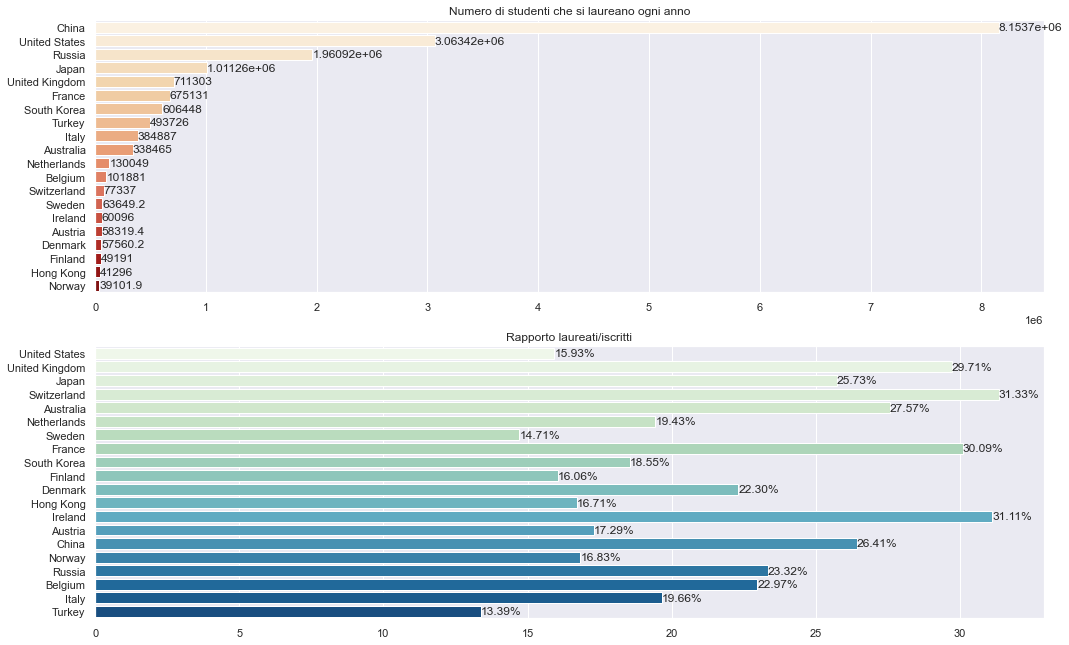

In [120]:
df_all_top100_graph_rap = df_all_top100.dropna(subset=['laureati/iscritti %'])
df_all_top100_graph_rap.reset_index(drop=True, inplace=True)

fig, axes = plt.subplots(2, 1,figsize=(17, 11))

sns.barplot(ax=axes[0],x=df_all_top100.sort_values("laureati università",ascending=False)['laureati università'].head(20), y=df_all_top100.sort_values(
    "laureati università",ascending=False)['country'].head(20),palette="OrRd")
axes[0].set_title("Numero di studenti che si laureano ogni anno")
sns.barplot(ax=axes[1],x=df_all_top100_graph_rap['laureati/iscritti %'], y=df_all_top100_graph_rap['country'],palette="GnBu")
axes[1].set_title("Rapporto laureati/iscritti")

axes[0].set_ylabel('') 
axes[1].set_ylabel('') 
axes[0].set_xlabel('') 
axes[1].set_xlabel('') 

for i in axes[0].containers:
    axes[0].bar_label(i)
for i in axes[1].containers:
    axes[1].bar_label(i,fmt='%.2f%%')

Nel primo grafico si osserva il numero di laureati ogni anno in ogni paese. La Cina si posiziona al primo posto seguita dagli Stati Uniti e dalla Russia. Tuttavia, è importante considerare che questi dati sono influenzati dalla popolazione di ciascun paese, ovvero quanto più abitanti ci sono, tanto più probabile è che il numero di laureati sia elevato. 

Nel secondo grafico, invece, si analizza il rapporto tra laureati e iscritti. Non so se è un dato preoccupante ma solo una persona su tre, nei migliori dei casi per le università, completa lo studio universitario. Nel peggiore dei casi siamo ad un rapporto di quasi 1 a 10.

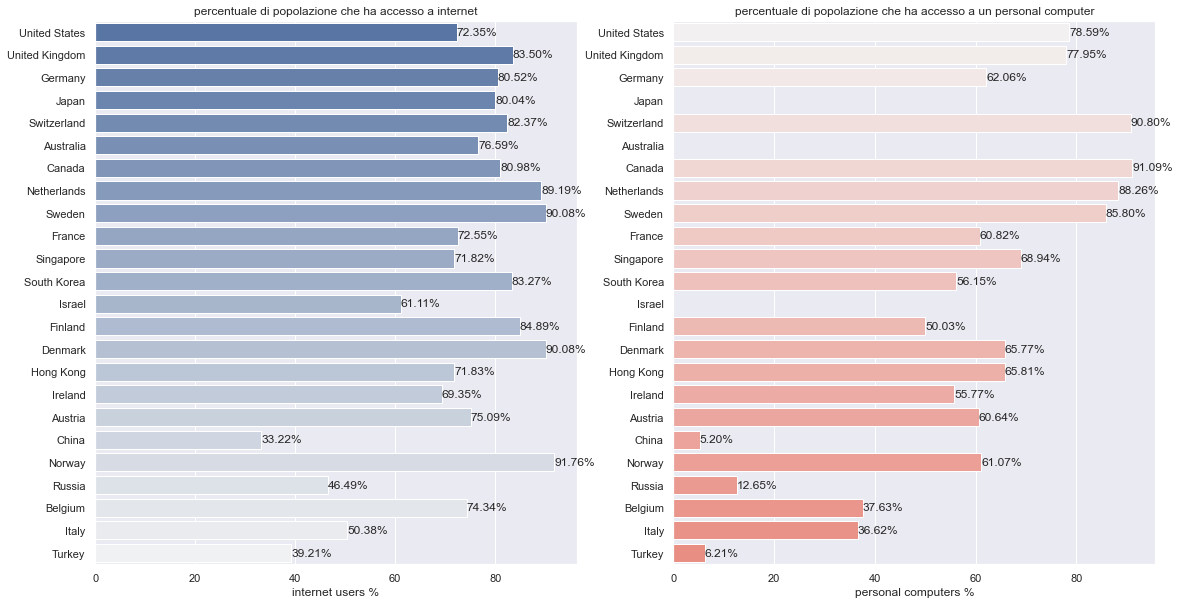

In [121]:
fig, axes = plt.subplots(1, 2,figsize=(19, 10))

sns.barplot(ax=axes[0],x=df_all_top100.head(25)['internet users %'], y=df_all_top100.head(25)['country'],palette="light:b_r")
axes[0].set_title("percentuale di popolazione che ha accesso a internet")
sns.barplot(ax=axes[1],x=df_all_top100['personal computers %'].head(25), y=df_all_top100['country'].head(25),palette="light:salmon")
sns.set_theme(color_codes=True)
axes[1].set_title("percentuale di popolazione che ha accesso a un personal computer")
axes[0].set_ylabel('') 
axes[1].set_ylabel('') 

for i in axes[0].containers:
    axes[0].bar_label(i,fmt='%.2f%%')
for i in axes[1].containers:
    axes[1].bar_label(i,fmt='%.2f%%')
plt.show()

Ho analizzato 2 ulteriori dati per valutare il livello di istruzione dei paesi, ovvero la percentuale di utilizzatori di internet e di possessori di un personal computer. In un'epoca sempre più digitalizzata, l'uso di internet e dei computer sono diventati fondamentali per informarsi, studiare e lavorare, per cui ritengo importante considerare questo aspetto nella valutazione dell'istruzione dei paesi.

I paesi più occidentalizzati sono i maggiori utilizzatori di internet e dei personal computer. Si può dedurre che la capacità di utilizzare i computer e internet dia un grande vantaggio nell'apprendimento di nuove competenze e abilità.

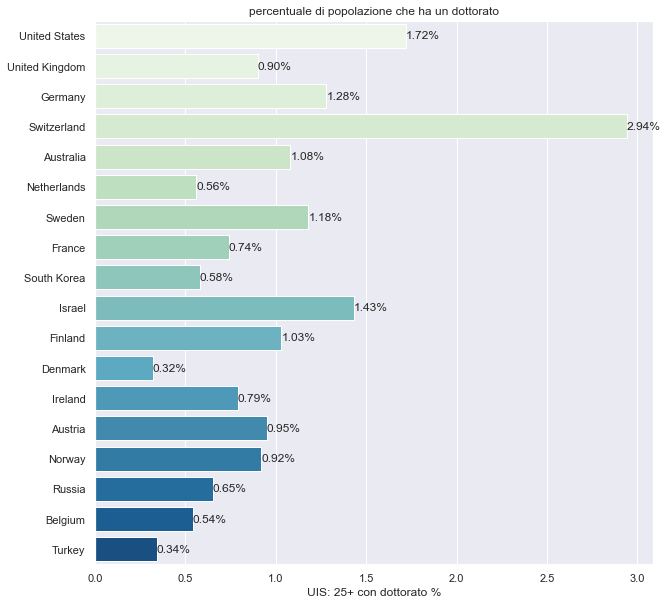

In [122]:
df_all_top100_graph_dot = df_all_top100.dropna(subset=['UIS: 25+ con dottorato %'])
df_all_top100_graph_dot.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(ax=ax, x=df_all_top100_graph_dot.head(25)['UIS: 25+ con dottorato %'], y=df_all_top100_graph_dot.head(25)['country'], palette="GnBu")
ax.set_title("percentuale di popolazione che ha un dottorato")
ax.set_ylabel('') 

for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%')
    
plt.show()


Da questa rappresentazione possiamo vedere che la Svizzera ha una percentuale molto alta, rispetto agli altri, per quanto riguarda la percentuale di persone con un dottorato. Al secondo posto troviamo gli Stati Uniti. Comunque possiamo notare che le persone con un dottorato di ricerca sono davvero pochissime a prescindere dallo stato.

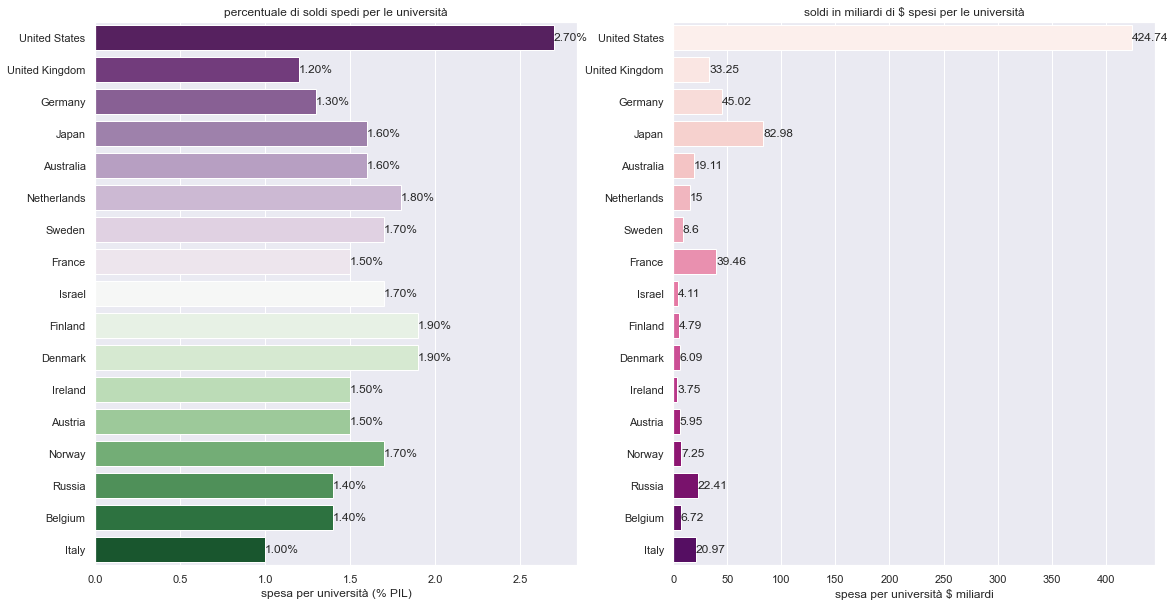

In [123]:
df_all_top100_graph_exp = df_all_top100.dropna(subset=['spesa per università (% PIL)'])
df_all_top100_graph_exp = df_all_top100_graph_exp.dropna(subset=['spesa per università $ miliardi'])

df_all_top100_graph_exp.reset_index(drop=True, inplace=True)

fig, axes = plt.subplots(1, 2,figsize=(19, 10))

sns.barplot(ax=axes[0],x=df_all_top100_graph_exp.head(25)['spesa per università (% PIL)'], y=df_all_top100_graph_exp.head(25)['country'],palette="PRGn")
axes[0].set_title("percentuale di soldi spedi per le università")
sns.barplot(ax=axes[1],x=df_all_top100_graph_exp['spesa per università $ miliardi'].head(25), y=df_all_top100_graph_exp['country'].head(25),palette="RdPu")
sns.set_theme(color_codes=True)
axes[1].set_title("soldi in miliardi di $ spesi per le università")
axes[0].set_ylabel('') 
axes[1].set_ylabel('') 

for i in axes[0].containers:
    axes[0].bar_label(i,fmt='%.2f%%')
for i in axes[1].containers:
    axes[1].bar_label(i,)

plt.show()


Questi due grafici mostrano la percentuale del PIL che ogni paese spende ogni anno per l'università (a sinistra) e per tutta l'istruzione in generale (a destra).

Per quanto riguarda la spesa per l'università, gli Stati Uniti sono al primo posto con il 2,7% del loro PIL destinato a questo settore. Sorprende la posizione del Regno Unito, che nonostante il numero elevato di università, si colloca al penultimo posto in questa classifica con solo l'1,2% di spesa, subito davanti all'Italia, che invece spende solo l'1%.

Per quanto riguarda la spesa per tutta l'istruzione, i primi due posti sono occupati dalla Danimarca e da Israele , seguiti dagli Stati Uniti. Si può notare che gli Stati Uniti destinano molti più soldi all'università rispetto agli altri livelli di istruzione, rispetto ad altri paesi. 

Text(0.5, 1.0, "Miliardi di dollari spesi per l'università")

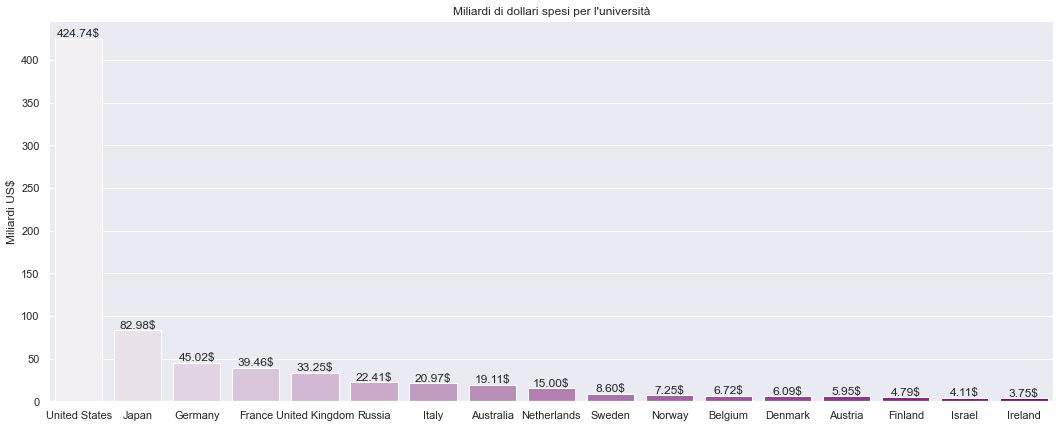

In [124]:

plt.figure(figsize=(18,7))
fig=sns.barplot(x=df_all_top100.sort_values('spesa per università $ miliardi',ascending=False).head(17)['country'],
            y=df_all_top100.sort_values('spesa per università $ miliardi', 
                                  ascending=False)['spesa per università $ miliardi'],palette="light:purple")

plt.ylabel('Miliardi US$')
plt.xlabel('')
for i in fig.containers:
    fig.bar_label(i,fmt='%.2f$')
plt.title("Miliardi di dollari spesi per l'università")

Qui possiamo osservare una visione più nitida sulle effettive spese in miliardi di dollari sostenute da ogni paese per l'università. Il divario tra il primo e il secondo posto è abissale gli Stati Uniti spendono 486 miliardi di dollari all'anno per l'università, mentre il Giappone si piazza al secondo posto con soli 70 miliardi. Questa potrebbe essere una delle principali ragioni per cui gli Stati Uniti vantano le università migliori al mondo. 

305

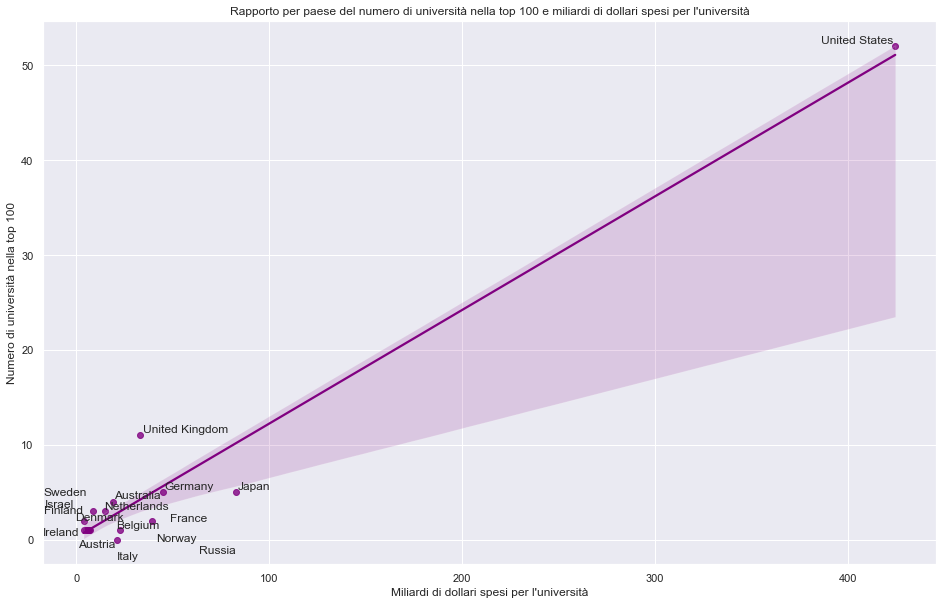

In [125]:
df_all_top100_graph = df_all_top100.dropna(subset=['spesa per università $ miliardi'])
df_all_top100_graph.reset_index(drop=True, inplace=True)

plt.rcParams['figure.figsize']=16,10
x= df_all_top100_graph['spesa per università $ miliardi']
y= df_all_top100_graph['num univ']
sns.set_theme(color_codes=True)
ax = sns.regplot(x, y,data=df_all_top100,ci=80,color="purple")
ax.grid(True)
plt.title("Rapporto per paese del numero di università nella top 100 e miliardi di dollari spesi per l'università")
plt.xlabel("Miliardi di dollari spesi per l'università")
plt.ylabel("Numero di università nella top 100")
textsus=[]

for i, txt in enumerate(df_all_top100_graph['country']):
    textsus.append(ax.text(df_all_top100_graph['spesa per università $ miliardi'][i], df_all_top100_graph['num univ'][i], txt))
    
adjust_text(textsus)

In questo grafico si nota ancora di più il divario tra i miliardi spesi dagli Stati Uniti per l'università rispetto al resto del mondo. Andrò a eliminare gli Stati Uniti per vedere meglio la situazione degli altri paesi.

In [126]:
# rimuovo gli Stati Uniti
df_all_top100_graph_2 = df_all_top100_graph.drop(df_all_top100_graph[df_all_top100_graph['country'] == 'United States'].index)
df_all_top100_graph_2.reset_index(drop=True, inplace=True)

59

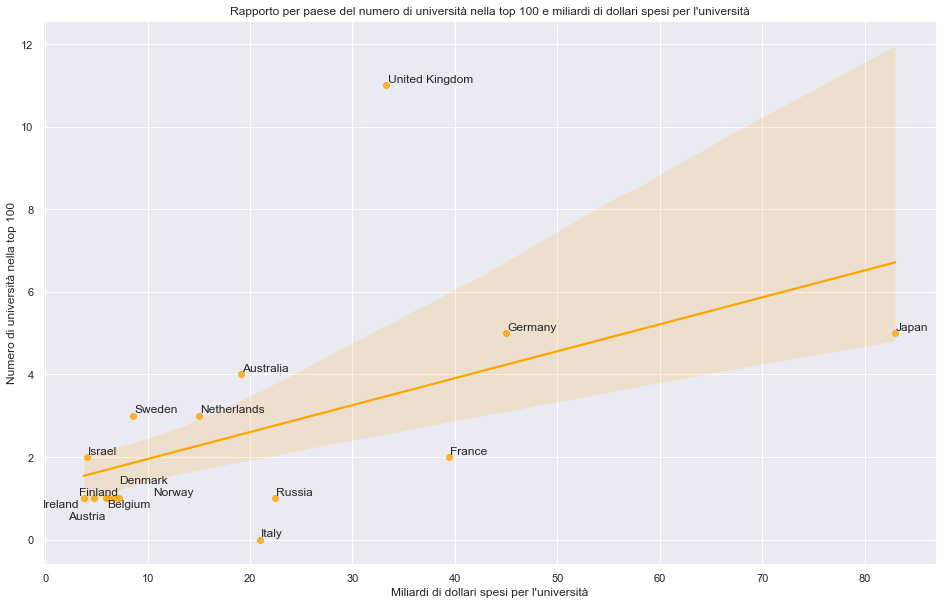

In [127]:

plt.rcParams['figure.figsize']=16,10
x= df_all_top100_graph_2['spesa per università $ miliardi']
y= df_all_top100_graph_2['num univ']
sns.set_theme(color_codes=True)
ax = sns.regplot(x, y,data=df_all_top100,ci=80,color="orange")
ax.grid(True)
plt.title("Rapporto per paese del numero di università nella top 100 e miliardi di dollari spesi per l'università")
plt.xlabel("Miliardi di dollari spesi per l'università")
plt.ylabel("Numero di università nella top 100")
textsus=[]

for i, txt in enumerate(df_all_top100_graph_2['country']):
    textsus.append(ax.text(df_all_top100_graph_2['spesa per università $ miliardi'][i], df_all_top100_graph_2['num univ'][i], txt))
    
adjust_text(textsus)

Da questo grafico possiamo vedere che il Regno Unito è il miglior paese a sfruttare le resorse a disposizione, con una spesa relativamente bassa ottiene dei risultati altissimi. Purtroppo troviamo come peggiore l'Italia che con una spesa media ottiene pochissimi risultati.

Analizzando la situazione economica dei paesi presi in considerazione, possiamo trarre alcune importanti conclusioni. Ad esempio, guardando agli Stati Uniti, paese con una capacità economica molto elevata, possiamo notare come una maggiore disponibilità di risorse finanziarie possa portare a ottenere un maggior numero di risultati. In altre parole, una volta superata una certa soglia di denaro, sembra esserci una correlazione diretta tra la quantità di soldi spesi e i risultati ottenuti.

Tuttavia, è importante sottolineare che non sempre la disponibilità di risorse finanziarie è l'unico fattore determinante per ottenere ottimi risultati. Come dimostrato dal caso del Regno Unito, infatti, è possibile conseguire eccellenti livelli anche basandosi sull'efficienza e sulla razionalizzazione delle risorse disponibili, senza necessariamente avere le risorse finanziarie degli Stati Uniti. 

## 5. Conclusioni

Dopo aver condotto le analisi è giunto il momento di trarre le conclusioni:

### 5.1 Quali sono i paesi con le università di maggiore qualità?


Dalle analisi condotte nel progetto, è emerso che gli Stati Uniti sono al primo posto nella classifica delle migliori università con un netto distacco rispetto al Regno Unito al secondo posto. A seguire, principalmente, si trovano Germania, Giappone, Svezia, Canada, Francia, Australia e Svizzera. In generale, a livello continentale, non si riscontra alcun paese dell'Europa meridionale, del Sud America e dell'Africa con università di alto livello. Tuttavia, va sottolineato che questa classifica è basata su un insieme di fattori specifici e potrebbe non necessariamente riflettere la qualità generale dell'istruzione superiore nel paese.

### 5.2 I paesi con università di maggiore qualità hanno anche un livello di istruzione medio superiore?


In secondo luogo, a livello globale, i paesi che hanno università di maggior qualità hanno anche ottimi risultati su tutti i livelli di istruzione analizzati. Tuttavia, analizzando solo i paesi selezionati con università migliori, si può notare che non sempre la classifica corrisponde. Ad esempio, la Corea del Sud con solo una università in top 100 ha una percentuale di laureati più alta degli Stati Uniti. Quindi, si può affermare che un paese con università ottime tendenzialmente non avrà un livello di istruzione molto basso, ma non c'è una relazione diretta tra il numero di università di alto livello e il livello di istruzione del paese.

### 5.3 I paesi che investono di più nelle università hanno anche università di maggiore qualità?

In generale, si può dire che tendenzialmente i paesi che investono di più nelle università ottengono anche risultati migliori in termini di qualità delle università stesse. Ad esempio, gli Stati Uniti investono una quantità di denaro veramente sproporzionata rispetto agli altri paesi, e questo si riflette nella presenza di molte università di alto livello nella classifica mondiale. Tuttavia, ci sono altri paesi, come il Regno Unito, che pur investendo meno di altri paesi ottengono comunque risultati eccellenti nella classifica mondiale delle università. Inoltre, come evidenziato nella risposta alla domanda 5.2, non c'è una relazione diretta tra il numero di università di alto livello di un paese e il livello di istruzione del paese stesso. Quindi si può affermare che il livello di investimento nel sistema universitario di un paese è un fattore importante per la qualità delle università, ma non è l'unico fattore determinante. 